In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#전처리
from sklearn.preprocessing import LabelEncoder, StandardScaler

#데이터분리
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV

#모델링
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier

#성과 평가 지표
from sklearn.metrics import accuracy_score, mean_squared_error

In [6]:
train=pd.read_csv('train.csv', index_col=0)
test=pd.read_csv('test_x.csv', index_col=0)
submission=pd.read_csv('sample_submission.csv', index_col=0)  
print(train.shape)
print(test.shape)
print(submission.shape)

(45532, 77)
(11383, 76)
(11383, 1)


In [7]:
#타겟인 'voted'변수를 train_y로 만들어줍니다
train_x = train.drop('voted', axis = 1)
train_y = train['voted']

In [4]:
#빠른 제출 절차를 확인하기 위해 '문자열' 변수들을 '이산형'으로 변환해줍니다.
#age_group, gender, race, religion
train_x['age_group']=1
train_x['gender']=1
train_x['race']=1
train_x['religion']=1

test['age_group']=1
test['gender']=1
test['race']=1
test['religion']=1

In [8]:
#질문만 일단 제거해본다.
#drop_val = ['QaA', 'QbA',  'QcA','QdA',  
 #           'QeA','QfA',  'QgA',  'QhA',  
  #          'QiA',  'QjA', 'QkA', 'QlA', 
   #         'QmA',  'QnA',  'QoA', 'QpA', 
    #        'QqA',  'QrA',  'QsA',  'QtA',
     #      'tp01', 'tp02', 'tp03', 'tp04', 'tp05',
      # 'tp06', 'tp07', 'tp08',  'tp10', 'urban', 'wf_01',
       #'wf_02', 'wf_03', 'wr_01',  'wr_03', 'wr_04', 'wr_05', 'wr_06',
       #'wr_07', 'wr_08', 'wr_09', 'wr_11', 'wr_12', 'wr_13']

#drop_val = ['gender','familysize','hand',
 #        'engnat',
 #      'QaE',  'QbE',  'QcE', 'QdE', 
 #       'QfE',  'QgE',  'QhE',  
 #       'QkE',    'QmE',  'QnE',  'QoE',
 #         'QqE',  'QrE',  'QtE','tp01', 'tp02', 'tp03', 'tp04', 'tp05',
 #      'tp06', 'tp07', 'tp08',  'tp10', 'urban', 'wf_01',
 #      'wf_02', 'wf_03', 'wr_01',  'wr_03', 'wr_04', 'wr_05', 'wr_06',
 #      'wr_07', 'wr_08', 'wr_09', 'wr_11', 'wr_12', 'wr_13',
 #         'QaA','QbA', 'QcA', 'QdA',  'QeA',
 #      'QfA',  'QgA',  'QhA',  'QiA',  'QjA', 
 #      'QkA',  'QlA',  'QmA',  'QnA',  'QoA', 
 #      'QpA',  'QqA',  'QrA',  'QsA',  'QtA'
 #       ]

drop_val = ['QaA','QaE', 'QbA', 'QbE', 'QcA', 'QcE','QdA', 'QdE', 
            'QeA','QeE','QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 
            'QiA', 'QiE', 'QjA', 'QjE','QkA', 'QkE', 'QlA', 'QlE',
            'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE','QpA', 'QpE', 
            'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE']
train = train_x.drop(drop_val, axis = 1)
test = test.drop(drop_val, axis = 1)
train.head()

,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
index,,,,,,,,,,,,,,,,,,,,,
0,30s,2,1,4,Female,1,3,White,Other,2,...,0,1,0,1,1,0,1,0,1,1
1,20s,4,2,3,Female,1,1,Asian,Hindu,1,...,1,1,0,1,1,0,1,0,1,1
2,30s,3,1,3,Male,1,2,White,Other,2,...,1,1,0,1,1,1,1,0,1,1
3,20s,4,2,0,Female,1,1,Asian,Hindu,2,...,0,0,0,0,1,0,1,0,1,1
4,20s,3,1,2,Male,1,2,White,Agnostic,1,...,1,1,1,1,1,0,1,1,1,1


In [9]:
train_dummies = pd.get_dummies(train)
test_dummies = pd.get_dummies(test)

In [10]:
train_dummies

,education,engnat,familysize,hand,married,tp01,tp02,tp03,tp04,tp05,...,religion_Buddhist,religion_Christian_Catholic,religion_Christian_Mormon,religion_Christian_Other,religion_Christian_Protestant,religion_Hindu,religion_Jewish,religion_Muslim,religion_Other,religion_Sikh
index,,,,,,,,,,,,,,,,,,,,,
0,2,1,4,1,3,2,2,2,1,2,...,0,0,0,0,0,0,0,0,1,0
1,4,2,3,1,1,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,3,1,3,1,2,2,3,1,5,3,...,0,0,0,0,0,0,0,0,1,0
3,4,2,0,1,1,2,4,1,1,1,...,0,0,0,0,0,1,0,0,0,0
4,3,1,2,1,2,1,1,1,6,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,2,1,1,3,1,1,2,6,1,2,...,0,0,0,0,0,0,1,0,0,0
45528,2,1,2,1,1,2,2,2,3,1,...,0,0,0,0,0,0,0,0,0,0
45529,2,1,1,1,1,4,4,2,4,0,...,0,0,0,1,0,0,0,0,0,0


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_dummies_1 = scaler.fit_transform(train_dummies)
test_dummies_1 = scaler.fit_transform(test_dummies)

In [15]:
train_dummies_1.shape

(45532, 60)

In [22]:
train_dummies_2 = pd.DataFrame(data=train_dummies_1,columns = train_dummies.columns)
test_dummies_2 = pd.DataFrame(data=test_dummies_1,columns = test_dummies.columns)

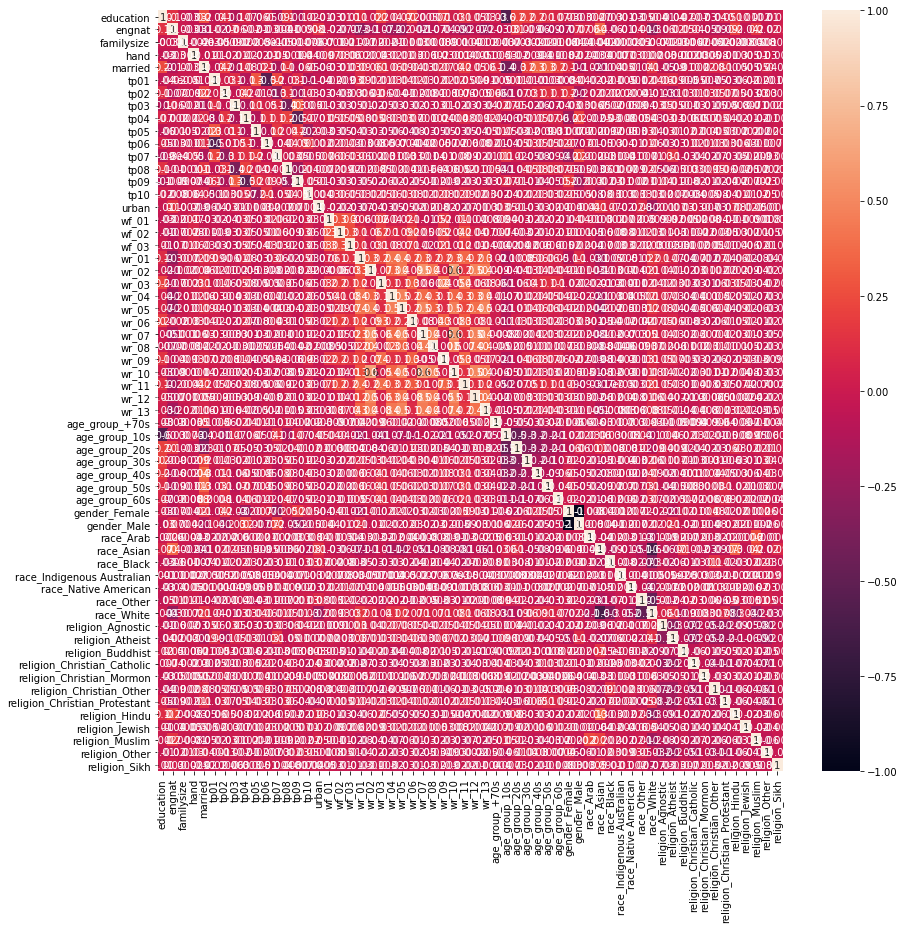

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = train_dummies_2.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True,fmt='.1g')

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=16)
pca.fit(train_dummies_2)
train_dummies_3 = pca.transform(train_dummies_2)
print(train_dummies_3.shape)
train_dummies_3

(45532, 16)


array([[ 0.60793341,  0.32790523, -1.91787739, ..., -1.82151405,
         2.01882832,  0.5583446 ],
       [ 1.5093249 , -1.05781181, -2.38324584, ..., -1.63859152,
         0.00666251,  0.55287281],
       [-1.40631898,  1.39660614,  0.94801674, ..., -1.28970998,
         1.8549869 ,  0.27125275],
       ...,
       [-0.43298673, -0.76365508, -1.93886516, ...,  0.62151501,
        -0.40967121, -1.50075781],
       [-1.51492028,  0.40220511,  1.68803665, ...,  0.64338657,
         0.5857726 ,  0.0962365 ],
       [-1.00317059, -1.19390119,  2.36378642, ..., -1.5054436 ,
        -0.15450262, -0.55061982]])

In [25]:
pca = PCA(n_components=16)
pca.fit(test_dummies_2)
test_dummies_3 = pca.transform(test_dummies_2)
print(test_dummies_3.shape)

(11383, 16)


In [26]:
pca_columns = ['pca_1','pca_2','pca_3','pca_4','pca_5','pca_6','pca_7','pca_8'
              ,'pca_9','pca_10','pca_11','pca_12','pca_13','pca_14','pca_15','pca_16']
train_dummies_4 = pd.DataFrame(train_dummies_3, columns= pca_columns)
train_dummies_4.head(3)

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16
0,0.607933,0.327905,-1.917877,-1.893874,-0.449708,-1.620956,-0.092193,-0.314158,0.228399,2.654075,-0.746527,0.636813,1.299756,-1.821514,2.018828,0.558345
1,1.509325,-1.057812,-2.383246,4.859443,1.013117,-0.626054,0.015834,0.065413,-1.656216,-0.204251,1.098433,0.050800,-0.473184,-1.638592,0.006663,0.552873
2,-1.406319,1.396606,0.948017,0.105514,-1.458838,-0.226071,-0.126816,0.110972,0.802172,2.088845,-0.375506,0.531402,1.808553,-1.289710,1.854987,0.271253


In [27]:

test_dummies_4 = pd.DataFrame(test_dummies_3, columns= pca_columns)
test_dummies_4.head(3)

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16
0,2.710912,-0.702235,0.492398,-0.675557,-1.772369,0.100613,-0.626918,1.047556,-0.968015,-0.939621,0.664763,-0.289912,-0.612913,-0.255243,-0.079272,-1.211017
1,11.176465,2.843368,2.887177,-1.491133,1.128549,-0.433270,1.779843,2.050683,1.156072,1.494918,1.655219,1.614506,-0.568785,3.718625,0.601944,0.611985
2,1.510456,-1.405956,-1.316179,-0.609692,-0.627382,-2.570088,2.438422,1.443122,1.294213,3.445544,2.173729,2.311413,-0.759929,-1.319526,-0.122583,-1.254468


In [28]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=0)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n.iloc[train_index] 
        y_tr = y_train_n.iloc[train_index] 
        X_te = X_train_n.iloc[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [29]:
knn_clf  = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)


In [30]:

knn_train, knn_test = get_stacking_base_datasets(knn_clf, train_dummies_4, train_y, test_dummies_4, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, train_dummies_4, train_y, test_dummies_4, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, train_dummies_4, train_y, test_dummies_4,  7)    
ada_train, ada_test = get_stacking_base_datasets(ada_clf, train_dummies_4, train_y, test_dummies_4, 7)

KNeighborsClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
RandomForestClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
DecisionTreeClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
AdaBoostClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 


In [31]:
# lgbm으로 
import lightgbm as lgbm
lgbm_clf = lgbm.LGBMClassifier(n_estimators=500)

In [32]:
from sklearn.model_selection import GridSearchCV

parameters = {'min_data_in_leaf':[15,20,25],'max_depth':[64,74,84]}
gridcv = GridSearchCV(lgbm_clf, param_grid=parameters, cv=3)
gridcv.fit(train_dummies_4, train_y, early_stopping_rounds=30, eval_metric="auc",
          eval_set = (train_dummies_4, train_y))

print('GridSearchCV 최적 파라미터:',gridcv.best_params_)

[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	valid_0's auc: 0.7337	valid_0's binary_logloss: 0.672033
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.738943	valid_0's binary_logloss: 0.658281
[3]	valid_0's auc: 0.743463	valid_0's binary_logloss: 0.646742
[4]	valid_0's auc: 0.744462	valid_0's binary_logloss: 0.637143
[5]	valid_0's auc: 0.74713	valid_0's binary_logloss: 0.62868
[6]	valid_0's auc: 0.748187	valid_0's binary_logloss: 0.621566
[7]	valid_0's auc: 0.74977	valid_0's binary_logloss: 0.615428
[8]	valid_0's auc: 0.7507	valid_0's binary_logloss: 0.60995
[9]	valid_0's auc: 0.751715	valid_0's binary_logloss: 0.605069
[10]	valid_0's auc: 0.752738	valid_0's binary_logloss: 0.600952
[11]	valid_0's auc: 0.753399	valid_0's binary_logloss: 0.597369
[12]	valid_0's auc: 0.754405

[133]	valid_0's auc: 0.819386	valid_0's binary_logloss: 0.52205
[134]	valid_0's auc: 0.819689	valid_0's binary_logloss: 0.52164
[135]	valid_0's auc: 0.82011	valid_0's binary_logloss: 0.521342
[136]	valid_0's auc: 0.820385	valid_0's binary_logloss: 0.521033
[137]	valid_0's auc: 0.82084	valid_0's binary_logloss: 0.520666
[138]	valid_0's auc: 0.821221	valid_0's binary_logloss: 0.520318
[139]	valid_0's auc: 0.821693	valid_0's binary_logloss: 0.519932
[140]	valid_0's auc: 0.822014	valid_0's binary_logloss: 0.519619
[141]	valid_0's auc: 0.822256	valid_0's binary_logloss: 0.519325
[142]	valid_0's auc: 0.822521	valid_0's binary_logloss: 0.519096
[143]	valid_0's auc: 0.82268	valid_0's binary_logloss: 0.518892
[144]	valid_0's auc: 0.822938	valid_0's binary_logloss: 0.518552
[145]	valid_0's auc: 0.823213	valid_0's binary_logloss: 0.518306
[146]	valid_0's auc: 0.823783	valid_0's binary_logloss: 0.517827
[147]	valid_0's auc: 0.82415	valid_0's binary_logloss: 0.51749
[148]	valid_0's auc: 0.824616	va

[268]	valid_0's auc: 0.858916	valid_0's binary_logloss: 0.482869
[269]	valid_0's auc: 0.859008	valid_0's binary_logloss: 0.482745
[270]	valid_0's auc: 0.859251	valid_0's binary_logloss: 0.482456
[271]	valid_0's auc: 0.859591	valid_0's binary_logloss: 0.482135
[272]	valid_0's auc: 0.859766	valid_0's binary_logloss: 0.481911
[273]	valid_0's auc: 0.859889	valid_0's binary_logloss: 0.481757
[274]	valid_0's auc: 0.860175	valid_0's binary_logloss: 0.481437
[275]	valid_0's auc: 0.860426	valid_0's binary_logloss: 0.48117
[276]	valid_0's auc: 0.8607	valid_0's binary_logloss: 0.480757
[277]	valid_0's auc: 0.860834	valid_0's binary_logloss: 0.480583
[278]	valid_0's auc: 0.861137	valid_0's binary_logloss: 0.480268
[279]	valid_0's auc: 0.86134	valid_0's binary_logloss: 0.480052
[280]	valid_0's auc: 0.861543	valid_0's binary_logloss: 0.479853
[281]	valid_0's auc: 0.861779	valid_0's binary_logloss: 0.479612
[282]	valid_0's auc: 0.862012	valid_0's binary_logloss: 0.479371
[283]	valid_0's auc: 0.862346

[407]	valid_0's auc: 0.885061	valid_0's binary_logloss: 0.450055
[408]	valid_0's auc: 0.885336	valid_0's binary_logloss: 0.449743
[409]	valid_0's auc: 0.885371	valid_0's binary_logloss: 0.449656
[410]	valid_0's auc: 0.885578	valid_0's binary_logloss: 0.449381
[411]	valid_0's auc: 0.88573	valid_0's binary_logloss: 0.449163
[412]	valid_0's auc: 0.885843	valid_0's binary_logloss: 0.448978
[413]	valid_0's auc: 0.885926	valid_0's binary_logloss: 0.448836
[414]	valid_0's auc: 0.886053	valid_0's binary_logloss: 0.448658
[415]	valid_0's auc: 0.886397	valid_0's binary_logloss: 0.448299
[416]	valid_0's auc: 0.886473	valid_0's binary_logloss: 0.448151
[417]	valid_0's auc: 0.886541	valid_0's binary_logloss: 0.448044
[418]	valid_0's auc: 0.886746	valid_0's binary_logloss: 0.447769
[419]	valid_0's auc: 0.886789	valid_0's binary_logloss: 0.447689
[420]	valid_0's auc: 0.886964	valid_0's binary_logloss: 0.447425
[421]	valid_0's auc: 0.887104	valid_0's binary_logloss: 0.447217
[422]	valid_0's auc: 0.887

[34]	valid_0's auc: 0.77115	valid_0's binary_logloss: 0.563731
[35]	valid_0's auc: 0.771861	valid_0's binary_logloss: 0.562946
[36]	valid_0's auc: 0.772625	valid_0's binary_logloss: 0.562276
[37]	valid_0's auc: 0.773157	valid_0's binary_logloss: 0.561615
[38]	valid_0's auc: 0.773602	valid_0's binary_logloss: 0.56102
[39]	valid_0's auc: 0.774334	valid_0's binary_logloss: 0.560406
[40]	valid_0's auc: 0.775019	valid_0's binary_logloss: 0.559819
[41]	valid_0's auc: 0.775422	valid_0's binary_logloss: 0.559238
[42]	valid_0's auc: 0.776142	valid_0's binary_logloss: 0.558553
[43]	valid_0's auc: 0.776816	valid_0's binary_logloss: 0.557976
[44]	valid_0's auc: 0.777514	valid_0's binary_logloss: 0.557418
[45]	valid_0's auc: 0.777953	valid_0's binary_logloss: 0.556961
[46]	valid_0's auc: 0.778398	valid_0's binary_logloss: 0.556529
[47]	valid_0's auc: 0.778956	valid_0's binary_logloss: 0.556053
[48]	valid_0's auc: 0.77964	valid_0's binary_logloss: 0.555456
[49]	valid_0's auc: 0.780366	valid_0's bina

[179]	valid_0's auc: 0.831944	valid_0's binary_logloss: 0.51033
[180]	valid_0's auc: 0.832211	valid_0's binary_logloss: 0.510032
[181]	valid_0's auc: 0.832487	valid_0's binary_logloss: 0.509709
[182]	valid_0's auc: 0.832733	valid_0's binary_logloss: 0.509478
[183]	valid_0's auc: 0.832859	valid_0's binary_logloss: 0.509268
[184]	valid_0's auc: 0.833107	valid_0's binary_logloss: 0.508965
[185]	valid_0's auc: 0.833423	valid_0's binary_logloss: 0.5087
[186]	valid_0's auc: 0.833691	valid_0's binary_logloss: 0.508452
[187]	valid_0's auc: 0.834068	valid_0's binary_logloss: 0.508109
[188]	valid_0's auc: 0.834306	valid_0's binary_logloss: 0.507865
[189]	valid_0's auc: 0.834611	valid_0's binary_logloss: 0.507563
[190]	valid_0's auc: 0.834946	valid_0's binary_logloss: 0.507282
[191]	valid_0's auc: 0.835388	valid_0's binary_logloss: 0.506898
[192]	valid_0's auc: 0.835716	valid_0's binary_logloss: 0.506628
[193]	valid_0's auc: 0.835991	valid_0's binary_logloss: 0.506357
[194]	valid_0's auc: 0.83633

[327]	valid_0's auc: 0.869108	valid_0's binary_logloss: 0.470766
[328]	valid_0's auc: 0.869153	valid_0's binary_logloss: 0.470659
[329]	valid_0's auc: 0.869387	valid_0's binary_logloss: 0.470421
[330]	valid_0's auc: 0.869542	valid_0's binary_logloss: 0.470186
[331]	valid_0's auc: 0.869572	valid_0's binary_logloss: 0.470109
[332]	valid_0's auc: 0.869692	valid_0's binary_logloss: 0.469939
[333]	valid_0's auc: 0.869834	valid_0's binary_logloss: 0.469777
[334]	valid_0's auc: 0.86997	valid_0's binary_logloss: 0.469599
[335]	valid_0's auc: 0.870095	valid_0's binary_logloss: 0.469414
[336]	valid_0's auc: 0.870183	valid_0's binary_logloss: 0.469301
[337]	valid_0's auc: 0.870307	valid_0's binary_logloss: 0.469109
[338]	valid_0's auc: 0.870394	valid_0's binary_logloss: 0.468981
[339]	valid_0's auc: 0.870751	valid_0's binary_logloss: 0.468655
[340]	valid_0's auc: 0.870988	valid_0's binary_logloss: 0.468383
[341]	valid_0's auc: 0.871305	valid_0's binary_logloss: 0.468059
[342]	valid_0's auc: 0.871

[482]	valid_0's auc: 0.894313	valid_0's binary_logloss: 0.437381
[483]	valid_0's auc: 0.894442	valid_0's binary_logloss: 0.437145
[484]	valid_0's auc: 0.894575	valid_0's binary_logloss: 0.436964
[485]	valid_0's auc: 0.894629	valid_0's binary_logloss: 0.436842
[486]	valid_0's auc: 0.894635	valid_0's binary_logloss: 0.436791
[487]	valid_0's auc: 0.894778	valid_0's binary_logloss: 0.436581
[488]	valid_0's auc: 0.894961	valid_0's binary_logloss: 0.436316
[489]	valid_0's auc: 0.895073	valid_0's binary_logloss: 0.436128
[490]	valid_0's auc: 0.89521	valid_0's binary_logloss: 0.43592
[491]	valid_0's auc: 0.895258	valid_0's binary_logloss: 0.435827
[492]	valid_0's auc: 0.895427	valid_0's binary_logloss: 0.435578
[493]	valid_0's auc: 0.895639	valid_0's binary_logloss: 0.435302
[494]	valid_0's auc: 0.895757	valid_0's binary_logloss: 0.435134
[495]	valid_0's auc: 0.895884	valid_0's binary_logloss: 0.434911
[496]	valid_0's auc: 0.896011	valid_0's binary_logloss: 0.434708
[497]	valid_0's auc: 0.8961

[112]	valid_0's auc: 0.810566	valid_0's binary_logloss: 0.529735
[113]	valid_0's auc: 0.810974	valid_0's binary_logloss: 0.52944
[114]	valid_0's auc: 0.8115	valid_0's binary_logloss: 0.528993
[115]	valid_0's auc: 0.811742	valid_0's binary_logloss: 0.528715
[116]	valid_0's auc: 0.81213	valid_0's binary_logloss: 0.528406
[117]	valid_0's auc: 0.812379	valid_0's binary_logloss: 0.528178
[118]	valid_0's auc: 0.812981	valid_0's binary_logloss: 0.527797
[119]	valid_0's auc: 0.813125	valid_0's binary_logloss: 0.527634
[120]	valid_0's auc: 0.813699	valid_0's binary_logloss: 0.527206
[121]	valid_0's auc: 0.814148	valid_0's binary_logloss: 0.52687
[122]	valid_0's auc: 0.814477	valid_0's binary_logloss: 0.526594
[123]	valid_0's auc: 0.814889	valid_0's binary_logloss: 0.526228
[124]	valid_0's auc: 0.815201	valid_0's binary_logloss: 0.525824
[125]	valid_0's auc: 0.815565	valid_0's binary_logloss: 0.525447
[126]	valid_0's auc: 0.815988	valid_0's binary_logloss: 0.525109
[127]	valid_0's auc: 0.81643	v

[255]	valid_0's auc: 0.853609	valid_0's binary_logloss: 0.488117
[256]	valid_0's auc: 0.853713	valid_0's binary_logloss: 0.487963
[257]	valid_0's auc: 0.85408	valid_0's binary_logloss: 0.487636
[258]	valid_0's auc: 0.854334	valid_0's binary_logloss: 0.487353
[259]	valid_0's auc: 0.854596	valid_0's binary_logloss: 0.487006
[260]	valid_0's auc: 0.854946	valid_0's binary_logloss: 0.48661
[261]	valid_0's auc: 0.855209	valid_0's binary_logloss: 0.486332
[262]	valid_0's auc: 0.855391	valid_0's binary_logloss: 0.486087
[263]	valid_0's auc: 0.855481	valid_0's binary_logloss: 0.485922
[264]	valid_0's auc: 0.855736	valid_0's binary_logloss: 0.485625
[265]	valid_0's auc: 0.85604	valid_0's binary_logloss: 0.4853
[266]	valid_0's auc: 0.856409	valid_0's binary_logloss: 0.484986
[267]	valid_0's auc: 0.856648	valid_0's binary_logloss: 0.48467
[268]	valid_0's auc: 0.85682	valid_0's binary_logloss: 0.484436
[269]	valid_0's auc: 0.857072	valid_0's binary_logloss: 0.484175
[270]	valid_0's auc: 0.85722	val

[393]	valid_0's auc: 0.879968	valid_0's binary_logloss: 0.456164
[394]	valid_0's auc: 0.880035	valid_0's binary_logloss: 0.456046
[395]	valid_0's auc: 0.880165	valid_0's binary_logloss: 0.455788
[396]	valid_0's auc: 0.880311	valid_0's binary_logloss: 0.455586
[397]	valid_0's auc: 0.88057	valid_0's binary_logloss: 0.455337
[398]	valid_0's auc: 0.880702	valid_0's binary_logloss: 0.455127
[399]	valid_0's auc: 0.880722	valid_0's binary_logloss: 0.455063
[400]	valid_0's auc: 0.880838	valid_0's binary_logloss: 0.454882
[401]	valid_0's auc: 0.880969	valid_0's binary_logloss: 0.454689
[402]	valid_0's auc: 0.881196	valid_0's binary_logloss: 0.45441
[403]	valid_0's auc: 0.881438	valid_0's binary_logloss: 0.454116
[404]	valid_0's auc: 0.881708	valid_0's binary_logloss: 0.453793
[405]	valid_0's auc: 0.881798	valid_0's binary_logloss: 0.453653
[406]	valid_0's auc: 0.881942	valid_0's binary_logloss: 0.453448
[407]	valid_0's auc: 0.881965	valid_0's binary_logloss: 0.453383
[408]	valid_0's auc: 0.8821

[33]	valid_0's auc: 0.771388	valid_0's binary_logloss: 0.564091
[34]	valid_0's auc: 0.772064	valid_0's binary_logloss: 0.563317
[35]	valid_0's auc: 0.772791	valid_0's binary_logloss: 0.562577
[36]	valid_0's auc: 0.773297	valid_0's binary_logloss: 0.561861
[37]	valid_0's auc: 0.774049	valid_0's binary_logloss: 0.56117
[38]	valid_0's auc: 0.774785	valid_0's binary_logloss: 0.560547
[39]	valid_0's auc: 0.77534	valid_0's binary_logloss: 0.559979
[40]	valid_0's auc: 0.7759	valid_0's binary_logloss: 0.559391
[41]	valid_0's auc: 0.776563	valid_0's binary_logloss: 0.558741
[42]	valid_0's auc: 0.777132	valid_0's binary_logloss: 0.55821
[43]	valid_0's auc: 0.7776	valid_0's binary_logloss: 0.557605
[44]	valid_0's auc: 0.778242	valid_0's binary_logloss: 0.557044
[45]	valid_0's auc: 0.778909	valid_0's binary_logloss: 0.556473
[46]	valid_0's auc: 0.779473	valid_0's binary_logloss: 0.555933
[47]	valid_0's auc: 0.780189	valid_0's binary_logloss: 0.555421
[48]	valid_0's auc: 0.780976	valid_0's binary_l

[177]	valid_0's auc: 0.831936	valid_0's binary_logloss: 0.509722
[178]	valid_0's auc: 0.832271	valid_0's binary_logloss: 0.509382
[179]	valid_0's auc: 0.832651	valid_0's binary_logloss: 0.509055
[180]	valid_0's auc: 0.832841	valid_0's binary_logloss: 0.508843
[181]	valid_0's auc: 0.833019	valid_0's binary_logloss: 0.508623
[182]	valid_0's auc: 0.833311	valid_0's binary_logloss: 0.50836
[183]	valid_0's auc: 0.83375	valid_0's binary_logloss: 0.507992
[184]	valid_0's auc: 0.834217	valid_0's binary_logloss: 0.507643
[185]	valid_0's auc: 0.834411	valid_0's binary_logloss: 0.507393
[186]	valid_0's auc: 0.834649	valid_0's binary_logloss: 0.50708
[187]	valid_0's auc: 0.83498	valid_0's binary_logloss: 0.506775
[188]	valid_0's auc: 0.835226	valid_0's binary_logloss: 0.506523
[189]	valid_0's auc: 0.835608	valid_0's binary_logloss: 0.506171
[190]	valid_0's auc: 0.836046	valid_0's binary_logloss: 0.505794
[191]	valid_0's auc: 0.836495	valid_0's binary_logloss: 0.505437
[192]	valid_0's auc: 0.836812

[314]	valid_0's auc: 0.866988	valid_0's binary_logloss: 0.472505
[315]	valid_0's auc: 0.867193	valid_0's binary_logloss: 0.472255
[316]	valid_0's auc: 0.867514	valid_0's binary_logloss: 0.471956
[317]	valid_0's auc: 0.867718	valid_0's binary_logloss: 0.471641
[318]	valid_0's auc: 0.867936	valid_0's binary_logloss: 0.471396
[319]	valid_0's auc: 0.868117	valid_0's binary_logloss: 0.471165
[320]	valid_0's auc: 0.868395	valid_0's binary_logloss: 0.470873
[321]	valid_0's auc: 0.868696	valid_0's binary_logloss: 0.470567
[322]	valid_0's auc: 0.868894	valid_0's binary_logloss: 0.470323
[323]	valid_0's auc: 0.869	valid_0's binary_logloss: 0.470153
[324]	valid_0's auc: 0.869171	valid_0's binary_logloss: 0.469953
[325]	valid_0's auc: 0.869339	valid_0's binary_logloss: 0.469743
[326]	valid_0's auc: 0.869582	valid_0's binary_logloss: 0.469487
[327]	valid_0's auc: 0.869867	valid_0's binary_logloss: 0.469184
[328]	valid_0's auc: 0.869993	valid_0's binary_logloss: 0.469003
[329]	valid_0's auc: 0.87022

[456]	valid_0's auc: 0.890492	valid_0's binary_logloss: 0.441816
[457]	valid_0's auc: 0.890576	valid_0's binary_logloss: 0.441668
[458]	valid_0's auc: 0.890802	valid_0's binary_logloss: 0.44141
[459]	valid_0's auc: 0.890928	valid_0's binary_logloss: 0.441209
[460]	valid_0's auc: 0.891036	valid_0's binary_logloss: 0.441021
[461]	valid_0's auc: 0.891172	valid_0's binary_logloss: 0.440809
[462]	valid_0's auc: 0.891407	valid_0's binary_logloss: 0.440514
[463]	valid_0's auc: 0.891583	valid_0's binary_logloss: 0.440285
[464]	valid_0's auc: 0.891631	valid_0's binary_logloss: 0.440197
[465]	valid_0's auc: 0.891719	valid_0's binary_logloss: 0.440033
[466]	valid_0's auc: 0.891913	valid_0's binary_logloss: 0.439798
[467]	valid_0's auc: 0.892064	valid_0's binary_logloss: 0.439594
[468]	valid_0's auc: 0.892266	valid_0's binary_logloss: 0.439352
[469]	valid_0's auc: 0.892426	valid_0's binary_logloss: 0.439142
[470]	valid_0's auc: 0.892459	valid_0's binary_logloss: 0.439052
[471]	valid_0's auc: 0.892

[86]	valid_0's auc: 0.798201	valid_0's binary_logloss: 0.540695
[87]	valid_0's auc: 0.798648	valid_0's binary_logloss: 0.540303
[88]	valid_0's auc: 0.79912	valid_0's binary_logloss: 0.539974
[89]	valid_0's auc: 0.799447	valid_0's binary_logloss: 0.5397
[90]	valid_0's auc: 0.799839	valid_0's binary_logloss: 0.539344
[91]	valid_0's auc: 0.800102	valid_0's binary_logloss: 0.538931
[92]	valid_0's auc: 0.800541	valid_0's binary_logloss: 0.538605
[93]	valid_0's auc: 0.800987	valid_0's binary_logloss: 0.538255
[94]	valid_0's auc: 0.801435	valid_0's binary_logloss: 0.537905
[95]	valid_0's auc: 0.802037	valid_0's binary_logloss: 0.537421
[96]	valid_0's auc: 0.802498	valid_0's binary_logloss: 0.536977
[97]	valid_0's auc: 0.802762	valid_0's binary_logloss: 0.536686
[98]	valid_0's auc: 0.803185	valid_0's binary_logloss: 0.536343
[99]	valid_0's auc: 0.803555	valid_0's binary_logloss: 0.536009
[100]	valid_0's auc: 0.803832	valid_0's binary_logloss: 0.535717
[101]	valid_0's auc: 0.804219	valid_0's bi

[221]	valid_0's auc: 0.844389	valid_0's binary_logloss: 0.498569
[222]	valid_0's auc: 0.84464	valid_0's binary_logloss: 0.498332
[223]	valid_0's auc: 0.844959	valid_0's binary_logloss: 0.498003
[224]	valid_0's auc: 0.845252	valid_0's binary_logloss: 0.497696
[225]	valid_0's auc: 0.845362	valid_0's binary_logloss: 0.497563
[226]	valid_0's auc: 0.84567	valid_0's binary_logloss: 0.497259
[227]	valid_0's auc: 0.845999	valid_0's binary_logloss: 0.496949
[228]	valid_0's auc: 0.846128	valid_0's binary_logloss: 0.49678
[229]	valid_0's auc: 0.846263	valid_0's binary_logloss: 0.496594
[230]	valid_0's auc: 0.846623	valid_0's binary_logloss: 0.49627
[231]	valid_0's auc: 0.847037	valid_0's binary_logloss: 0.49598
[232]	valid_0's auc: 0.847233	valid_0's binary_logloss: 0.495684
[233]	valid_0's auc: 0.847474	valid_0's binary_logloss: 0.495452
[234]	valid_0's auc: 0.847641	valid_0's binary_logloss: 0.49522
[235]	valid_0's auc: 0.847828	valid_0's binary_logloss: 0.494999
[236]	valid_0's auc: 0.848084	v

[369]	valid_0's auc: 0.878124	valid_0's binary_logloss: 0.460255
[370]	valid_0's auc: 0.878395	valid_0's binary_logloss: 0.459953
[371]	valid_0's auc: 0.878582	valid_0's binary_logloss: 0.459713
[372]	valid_0's auc: 0.878811	valid_0's binary_logloss: 0.459409
[373]	valid_0's auc: 0.878893	valid_0's binary_logloss: 0.459248
[374]	valid_0's auc: 0.878978	valid_0's binary_logloss: 0.459109
[375]	valid_0's auc: 0.87907	valid_0's binary_logloss: 0.458959
[376]	valid_0's auc: 0.87927	valid_0's binary_logloss: 0.458722
[377]	valid_0's auc: 0.87936	valid_0's binary_logloss: 0.458576
[378]	valid_0's auc: 0.879575	valid_0's binary_logloss: 0.458307
[379]	valid_0's auc: 0.879759	valid_0's binary_logloss: 0.458082
[380]	valid_0's auc: 0.87985	valid_0's binary_logloss: 0.457944
[381]	valid_0's auc: 0.879967	valid_0's binary_logloss: 0.457766
[382]	valid_0's auc: 0.880239	valid_0's binary_logloss: 0.45745
[383]	valid_0's auc: 0.88043	valid_0's binary_logloss: 0.457176
[384]	valid_0's auc: 0.880652	v

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	valid_0's auc: 0.732551	valid_0's binary_logloss: 0.672273
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.739121	valid_0's binary_logloss: 0.658436
[3]	valid_0's auc: 0.743752	valid_0's binary_logloss: 0.646801
[4]	valid_0's auc: 0.746491	valid_0's binary_logloss: 0.636769
[5]	valid_0's auc: 0.747748	valid_0's binary_logloss: 0.628355
[6]	valid_0's auc: 0.749831	valid_0's binary_logloss: 0.621118
[7]	valid_0's auc: 0.750983	valid_0's binary_logloss: 0.614989
[8]	valid_0's auc: 0.752038	valid_0's binary_logloss: 0.609601
[9]	valid_0's auc: 0.753073	valid_0's binary_logloss: 0.604895
[10]	valid_0's auc: 0.753991	valid_0's binary_logloss: 0.600732
[11]	valid_0's auc: 0.755173	valid_0's binary_logloss: 0.597028
[12]	valid_0's auc: 

[131]	valid_0's auc: 0.817164	valid_0's binary_logloss: 0.524393
[132]	valid_0's auc: 0.817466	valid_0's binary_logloss: 0.524122
[133]	valid_0's auc: 0.817755	valid_0's binary_logloss: 0.523826
[134]	valid_0's auc: 0.818173	valid_0's binary_logloss: 0.523383
[135]	valid_0's auc: 0.818791	valid_0's binary_logloss: 0.522963
[136]	valid_0's auc: 0.819045	valid_0's binary_logloss: 0.522734
[137]	valid_0's auc: 0.819233	valid_0's binary_logloss: 0.522473
[138]	valid_0's auc: 0.819727	valid_0's binary_logloss: 0.522053
[139]	valid_0's auc: 0.819923	valid_0's binary_logloss: 0.521806
[140]	valid_0's auc: 0.820314	valid_0's binary_logloss: 0.521438
[141]	valid_0's auc: 0.820704	valid_0's binary_logloss: 0.521089
[142]	valid_0's auc: 0.820965	valid_0's binary_logloss: 0.520814
[143]	valid_0's auc: 0.821209	valid_0's binary_logloss: 0.520587
[144]	valid_0's auc: 0.821506	valid_0's binary_logloss: 0.520283
[145]	valid_0's auc: 0.821755	valid_0's binary_logloss: 0.520053
[146]	valid_0's auc: 0.82

[269]	valid_0's auc: 0.855801	valid_0's binary_logloss: 0.485335
[270]	valid_0's auc: 0.856074	valid_0's binary_logloss: 0.48506
[271]	valid_0's auc: 0.856234	valid_0's binary_logloss: 0.484804
[272]	valid_0's auc: 0.856384	valid_0's binary_logloss: 0.484621
[273]	valid_0's auc: 0.856476	valid_0's binary_logloss: 0.484485
[274]	valid_0's auc: 0.856555	valid_0's binary_logloss: 0.484358
[275]	valid_0's auc: 0.856695	valid_0's binary_logloss: 0.484151
[276]	valid_0's auc: 0.856778	valid_0's binary_logloss: 0.484024
[277]	valid_0's auc: 0.85706	valid_0's binary_logloss: 0.483725
[278]	valid_0's auc: 0.857359	valid_0's binary_logloss: 0.483429
[279]	valid_0's auc: 0.857662	valid_0's binary_logloss: 0.483143
[280]	valid_0's auc: 0.857803	valid_0's binary_logloss: 0.482956
[281]	valid_0's auc: 0.858109	valid_0's binary_logloss: 0.48266
[282]	valid_0's auc: 0.858337	valid_0's binary_logloss: 0.482396
[283]	valid_0's auc: 0.858713	valid_0's binary_logloss: 0.482026
[284]	valid_0's auc: 0.85895

[413]	valid_0's auc: 0.88289	valid_0's binary_logloss: 0.452054
[414]	valid_0's auc: 0.883087	valid_0's binary_logloss: 0.451803
[415]	valid_0's auc: 0.883241	valid_0's binary_logloss: 0.451585
[416]	valid_0's auc: 0.883437	valid_0's binary_logloss: 0.451346
[417]	valid_0's auc: 0.883633	valid_0's binary_logloss: 0.451115
[418]	valid_0's auc: 0.8838	valid_0's binary_logloss: 0.45091
[419]	valid_0's auc: 0.884027	valid_0's binary_logloss: 0.450606
[420]	valid_0's auc: 0.884172	valid_0's binary_logloss: 0.4504
[421]	valid_0's auc: 0.88424	valid_0's binary_logloss: 0.45029
[422]	valid_0's auc: 0.884474	valid_0's binary_logloss: 0.449995
[423]	valid_0's auc: 0.884521	valid_0's binary_logloss: 0.449898
[424]	valid_0's auc: 0.884668	valid_0's binary_logloss: 0.449676
[425]	valid_0's auc: 0.884841	valid_0's binary_logloss: 0.449424
[426]	valid_0's auc: 0.885049	valid_0's binary_logloss: 0.449156
[427]	valid_0's auc: 0.885263	valid_0's binary_logloss: 0.448869
[428]	valid_0's auc: 0.88537	vali

[35]	valid_0's auc: 0.773016	valid_0's binary_logloss: 0.562675
[36]	valid_0's auc: 0.773589	valid_0's binary_logloss: 0.562006
[37]	valid_0's auc: 0.774287	valid_0's binary_logloss: 0.56133
[38]	valid_0's auc: 0.774925	valid_0's binary_logloss: 0.560665
[39]	valid_0's auc: 0.775506	valid_0's binary_logloss: 0.559972
[40]	valid_0's auc: 0.776106	valid_0's binary_logloss: 0.559244
[41]	valid_0's auc: 0.776871	valid_0's binary_logloss: 0.558672
[42]	valid_0's auc: 0.77756	valid_0's binary_logloss: 0.558129
[43]	valid_0's auc: 0.777977	valid_0's binary_logloss: 0.557623
[44]	valid_0's auc: 0.778577	valid_0's binary_logloss: 0.557012
[45]	valid_0's auc: 0.779202	valid_0's binary_logloss: 0.556462
[46]	valid_0's auc: 0.779853	valid_0's binary_logloss: 0.55592
[47]	valid_0's auc: 0.780604	valid_0's binary_logloss: 0.555321
[48]	valid_0's auc: 0.781125	valid_0's binary_logloss: 0.554805
[49]	valid_0's auc: 0.781659	valid_0's binary_logloss: 0.554353
[50]	valid_0's auc: 0.78223	valid_0's binar

[172]	valid_0's auc: 0.83216	valid_0's binary_logloss: 0.51069
[173]	valid_0's auc: 0.832363	valid_0's binary_logloss: 0.510466
[174]	valid_0's auc: 0.832791	valid_0's binary_logloss: 0.510125
[175]	valid_0's auc: 0.833021	valid_0's binary_logloss: 0.509856
[176]	valid_0's auc: 0.833183	valid_0's binary_logloss: 0.509642
[177]	valid_0's auc: 0.83351	valid_0's binary_logloss: 0.509314
[178]	valid_0's auc: 0.83376	valid_0's binary_logloss: 0.509035
[179]	valid_0's auc: 0.834035	valid_0's binary_logloss: 0.508753
[180]	valid_0's auc: 0.834524	valid_0's binary_logloss: 0.508378
[181]	valid_0's auc: 0.8349	valid_0's binary_logloss: 0.507997
[182]	valid_0's auc: 0.835179	valid_0's binary_logloss: 0.507729
[183]	valid_0's auc: 0.835477	valid_0's binary_logloss: 0.507423
[184]	valid_0's auc: 0.835994	valid_0's binary_logloss: 0.507018
[185]	valid_0's auc: 0.836244	valid_0's binary_logloss: 0.506656
[186]	valid_0's auc: 0.836531	valid_0's binary_logloss: 0.5064
[187]	valid_0's auc: 0.836878	val

[320]	valid_0's auc: 0.868206	valid_0's binary_logloss: 0.471344
[321]	valid_0's auc: 0.868388	valid_0's binary_logloss: 0.471139
[322]	valid_0's auc: 0.86847	valid_0's binary_logloss: 0.470997
[323]	valid_0's auc: 0.868617	valid_0's binary_logloss: 0.470825
[324]	valid_0's auc: 0.868781	valid_0's binary_logloss: 0.470619
[325]	valid_0's auc: 0.868961	valid_0's binary_logloss: 0.470418
[326]	valid_0's auc: 0.869241	valid_0's binary_logloss: 0.470141
[327]	valid_0's auc: 0.869399	valid_0's binary_logloss: 0.469948
[328]	valid_0's auc: 0.86966	valid_0's binary_logloss: 0.469585
[329]	valid_0's auc: 0.869919	valid_0's binary_logloss: 0.469282
[330]	valid_0's auc: 0.870194	valid_0's binary_logloss: 0.469051
[331]	valid_0's auc: 0.870487	valid_0's binary_logloss: 0.468755
[332]	valid_0's auc: 0.870581	valid_0's binary_logloss: 0.468625
[333]	valid_0's auc: 0.870712	valid_0's binary_logloss: 0.46842
[334]	valid_0's auc: 0.870964	valid_0's binary_logloss: 0.468159
[335]	valid_0's auc: 0.87130

[452]	valid_0's auc: 0.889531	valid_0's binary_logloss: 0.443361
[453]	valid_0's auc: 0.889631	valid_0's binary_logloss: 0.443179
[454]	valid_0's auc: 0.889736	valid_0's binary_logloss: 0.443007
[455]	valid_0's auc: 0.889957	valid_0's binary_logloss: 0.442725
[456]	valid_0's auc: 0.890057	valid_0's binary_logloss: 0.442548
[457]	valid_0's auc: 0.890137	valid_0's binary_logloss: 0.442398
[458]	valid_0's auc: 0.890242	valid_0's binary_logloss: 0.442233
[459]	valid_0's auc: 0.890337	valid_0's binary_logloss: 0.442046
[460]	valid_0's auc: 0.89037	valid_0's binary_logloss: 0.441952
[461]	valid_0's auc: 0.890541	valid_0's binary_logloss: 0.441715
[462]	valid_0's auc: 0.890599	valid_0's binary_logloss: 0.441568
[463]	valid_0's auc: 0.890789	valid_0's binary_logloss: 0.441354
[464]	valid_0's auc: 0.890858	valid_0's binary_logloss: 0.441228
[465]	valid_0's auc: 0.891062	valid_0's binary_logloss: 0.440953
[466]	valid_0's auc: 0.891252	valid_0's binary_logloss: 0.440694
[467]	valid_0's auc: 0.891

[87]	valid_0's auc: 0.798311	valid_0's binary_logloss: 0.540521
[88]	valid_0's auc: 0.798882	valid_0's binary_logloss: 0.540065
[89]	valid_0's auc: 0.799583	valid_0's binary_logloss: 0.539562
[90]	valid_0's auc: 0.800085	valid_0's binary_logloss: 0.539143
[91]	valid_0's auc: 0.800363	valid_0's binary_logloss: 0.538864
[92]	valid_0's auc: 0.800816	valid_0's binary_logloss: 0.538503
[93]	valid_0's auc: 0.801096	valid_0's binary_logloss: 0.538243
[94]	valid_0's auc: 0.801811	valid_0's binary_logloss: 0.537757
[95]	valid_0's auc: 0.80227	valid_0's binary_logloss: 0.537311
[96]	valid_0's auc: 0.802729	valid_0's binary_logloss: 0.536945
[97]	valid_0's auc: 0.803307	valid_0's binary_logloss: 0.536562
[98]	valid_0's auc: 0.803894	valid_0's binary_logloss: 0.536156
[99]	valid_0's auc: 0.804431	valid_0's binary_logloss: 0.535754
[100]	valid_0's auc: 0.805001	valid_0's binary_logloss: 0.535288
[101]	valid_0's auc: 0.805544	valid_0's binary_logloss: 0.534824
[102]	valid_0's auc: 0.805838	valid_0's

[233]	valid_0's auc: 0.849547	valid_0's binary_logloss: 0.49371
[234]	valid_0's auc: 0.849942	valid_0's binary_logloss: 0.493269
[235]	valid_0's auc: 0.85009	valid_0's binary_logloss: 0.493075
[236]	valid_0's auc: 0.850416	valid_0's binary_logloss: 0.492762
[237]	valid_0's auc: 0.850744	valid_0's binary_logloss: 0.492451
[238]	valid_0's auc: 0.850955	valid_0's binary_logloss: 0.49221
[239]	valid_0's auc: 0.851174	valid_0's binary_logloss: 0.491965
[240]	valid_0's auc: 0.85125	valid_0's binary_logloss: 0.491827
[241]	valid_0's auc: 0.851401	valid_0's binary_logloss: 0.491613
[242]	valid_0's auc: 0.851623	valid_0's binary_logloss: 0.491403
[243]	valid_0's auc: 0.852036	valid_0's binary_logloss: 0.491042
[244]	valid_0's auc: 0.852262	valid_0's binary_logloss: 0.490787
[245]	valid_0's auc: 0.852358	valid_0's binary_logloss: 0.490669
[246]	valid_0's auc: 0.852706	valid_0's binary_logloss: 0.490336
[247]	valid_0's auc: 0.853043	valid_0's binary_logloss: 0.490053
[248]	valid_0's auc: 0.853326

[369]	valid_0's auc: 0.87838	valid_0's binary_logloss: 0.460321
[370]	valid_0's auc: 0.87849	valid_0's binary_logloss: 0.460187
[371]	valid_0's auc: 0.878583	valid_0's binary_logloss: 0.460044
[372]	valid_0's auc: 0.878672	valid_0's binary_logloss: 0.459875
[373]	valid_0's auc: 0.878769	valid_0's binary_logloss: 0.459762
[374]	valid_0's auc: 0.879011	valid_0's binary_logloss: 0.459472
[375]	valid_0's auc: 0.879208	valid_0's binary_logloss: 0.459206
[376]	valid_0's auc: 0.879388	valid_0's binary_logloss: 0.459008
[377]	valid_0's auc: 0.879603	valid_0's binary_logloss: 0.458766
[378]	valid_0's auc: 0.879773	valid_0's binary_logloss: 0.458532
[379]	valid_0's auc: 0.879961	valid_0's binary_logloss: 0.458303
[380]	valid_0's auc: 0.880196	valid_0's binary_logloss: 0.457991
[381]	valid_0's auc: 0.880378	valid_0's binary_logloss: 0.457757
[382]	valid_0's auc: 0.88055	valid_0's binary_logloss: 0.457501
[383]	valid_0's auc: 0.880775	valid_0's binary_logloss: 0.457218
[384]	valid_0's auc: 0.88086

[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	valid_0's auc: 0.732551	valid_0's binary_logloss: 0.672273
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.739121	valid_0's binary_logloss: 0.658436
[3]	valid_0's auc: 0.743752	valid_0's binary_logloss: 0.646801
[4]	valid_0's auc: 0.746491	valid_0's binary_logloss: 0.636769
[5]	valid_0's auc: 0.747748	valid_0's binary_logloss: 0.628355
[6]	valid_0's auc: 0.749813	valid_0's binary_logloss: 0.621117
[7]	valid_0's auc: 0.750912	valid_0's binary_logloss: 0.61496
[8]	valid_0's auc: 0.751825	valid_0's binary_logloss: 0.609548
[9]	valid_0's auc: 0.753133	valid_0's binary_logloss: 0.604888
[10]	valid_0's auc: 0.754233	valid_0's binary_logloss: 0.600747
[11]	valid_0's auc: 0.754863	valid_0's binary_logloss: 0.597124
[12]	valid_0's auc: 0

[144]	valid_0's auc: 0.821995	valid_0's binary_logloss: 0.519797
[145]	valid_0's auc: 0.822207	valid_0's binary_logloss: 0.519512
[146]	valid_0's auc: 0.822441	valid_0's binary_logloss: 0.51927
[147]	valid_0's auc: 0.822648	valid_0's binary_logloss: 0.51906
[148]	valid_0's auc: 0.822824	valid_0's binary_logloss: 0.51887
[149]	valid_0's auc: 0.823192	valid_0's binary_logloss: 0.518519
[150]	valid_0's auc: 0.823663	valid_0's binary_logloss: 0.518117
[151]	valid_0's auc: 0.824134	valid_0's binary_logloss: 0.517718
[152]	valid_0's auc: 0.824329	valid_0's binary_logloss: 0.517515
[153]	valid_0's auc: 0.824656	valid_0's binary_logloss: 0.517231
[154]	valid_0's auc: 0.825051	valid_0's binary_logloss: 0.516852
[155]	valid_0's auc: 0.825445	valid_0's binary_logloss: 0.516552
[156]	valid_0's auc: 0.825833	valid_0's binary_logloss: 0.516234
[157]	valid_0's auc: 0.826186	valid_0's binary_logloss: 0.515845
[158]	valid_0's auc: 0.826527	valid_0's binary_logloss: 0.515589
[159]	valid_0's auc: 0.82693

[279]	valid_0's auc: 0.858635	valid_0's binary_logloss: 0.482067
[280]	valid_0's auc: 0.85892	valid_0's binary_logloss: 0.481787
[281]	valid_0's auc: 0.859153	valid_0's binary_logloss: 0.481501
[282]	valid_0's auc: 0.859374	valid_0's binary_logloss: 0.481239
[283]	valid_0's auc: 0.859499	valid_0's binary_logloss: 0.481078
[284]	valid_0's auc: 0.859729	valid_0's binary_logloss: 0.480836
[285]	valid_0's auc: 0.85996	valid_0's binary_logloss: 0.480576
[286]	valid_0's auc: 0.860044	valid_0's binary_logloss: 0.48045
[287]	valid_0's auc: 0.860295	valid_0's binary_logloss: 0.480181
[288]	valid_0's auc: 0.860398	valid_0's binary_logloss: 0.480045
[289]	valid_0's auc: 0.860558	valid_0's binary_logloss: 0.479862
[290]	valid_0's auc: 0.860797	valid_0's binary_logloss: 0.479581
[291]	valid_0's auc: 0.860951	valid_0's binary_logloss: 0.479364
[292]	valid_0's auc: 0.861229	valid_0's binary_logloss: 0.479056
[293]	valid_0's auc: 0.861505	valid_0's binary_logloss: 0.478733
[294]	valid_0's auc: 0.86172

[428]	valid_0's auc: 0.886125	valid_0's binary_logloss: 0.448047
[429]	valid_0's auc: 0.886179	valid_0's binary_logloss: 0.447944
[430]	valid_0's auc: 0.886235	valid_0's binary_logloss: 0.447839
[431]	valid_0's auc: 0.886393	valid_0's binary_logloss: 0.447641
[432]	valid_0's auc: 0.886514	valid_0's binary_logloss: 0.447459
[433]	valid_0's auc: 0.886726	valid_0's binary_logloss: 0.447195
[434]	valid_0's auc: 0.887039	valid_0's binary_logloss: 0.446842
[435]	valid_0's auc: 0.887155	valid_0's binary_logloss: 0.44664
[436]	valid_0's auc: 0.887173	valid_0's binary_logloss: 0.44657
[437]	valid_0's auc: 0.887313	valid_0's binary_logloss: 0.446359
[438]	valid_0's auc: 0.887511	valid_0's binary_logloss: 0.4461
[439]	valid_0's auc: 0.887647	valid_0's binary_logloss: 0.445891
[440]	valid_0's auc: 0.887769	valid_0's binary_logloss: 0.445692
[441]	valid_0's auc: 0.887855	valid_0's binary_logloss: 0.445578
[442]	valid_0's auc: 0.888011	valid_0's binary_logloss: 0.44531
[443]	valid_0's auc: 0.88818	v

[57]	valid_0's auc: 0.785543	valid_0's binary_logloss: 0.550462
[58]	valid_0's auc: 0.785829	valid_0's binary_logloss: 0.550069
[59]	valid_0's auc: 0.786315	valid_0's binary_logloss: 0.549691
[60]	valid_0's auc: 0.786894	valid_0's binary_logloss: 0.549105
[61]	valid_0's auc: 0.78741	valid_0's binary_logloss: 0.548655
[62]	valid_0's auc: 0.788127	valid_0's binary_logloss: 0.548142
[63]	valid_0's auc: 0.788673	valid_0's binary_logloss: 0.54772
[64]	valid_0's auc: 0.789317	valid_0's binary_logloss: 0.547249
[65]	valid_0's auc: 0.789865	valid_0's binary_logloss: 0.546908
[66]	valid_0's auc: 0.790499	valid_0's binary_logloss: 0.546498
[67]	valid_0's auc: 0.791073	valid_0's binary_logloss: 0.546063
[68]	valid_0's auc: 0.79161	valid_0's binary_logloss: 0.545673
[69]	valid_0's auc: 0.792015	valid_0's binary_logloss: 0.54523
[70]	valid_0's auc: 0.792531	valid_0's binary_logloss: 0.54477
[71]	valid_0's auc: 0.792867	valid_0's binary_logloss: 0.544478
[72]	valid_0's auc: 0.793446	valid_0's binary

[189]	valid_0's auc: 0.838322	valid_0's binary_logloss: 0.504278
[190]	valid_0's auc: 0.838404	valid_0's binary_logloss: 0.504152
[191]	valid_0's auc: 0.838611	valid_0's binary_logloss: 0.503949
[192]	valid_0's auc: 0.838911	valid_0's binary_logloss: 0.50371
[193]	valid_0's auc: 0.839155	valid_0's binary_logloss: 0.503429
[194]	valid_0's auc: 0.839539	valid_0's binary_logloss: 0.503095
[195]	valid_0's auc: 0.839954	valid_0's binary_logloss: 0.502767
[196]	valid_0's auc: 0.840385	valid_0's binary_logloss: 0.502363
[197]	valid_0's auc: 0.840493	valid_0's binary_logloss: 0.502204
[198]	valid_0's auc: 0.840862	valid_0's binary_logloss: 0.501862
[199]	valid_0's auc: 0.841071	valid_0's binary_logloss: 0.501623
[200]	valid_0's auc: 0.841297	valid_0's binary_logloss: 0.501264
[201]	valid_0's auc: 0.841441	valid_0's binary_logloss: 0.501081
[202]	valid_0's auc: 0.84163	valid_0's binary_logloss: 0.500858
[203]	valid_0's auc: 0.842053	valid_0's binary_logloss: 0.500503
[204]	valid_0's auc: 0.8422

[337]	valid_0's auc: 0.873251	valid_0's binary_logloss: 0.465686
[338]	valid_0's auc: 0.873534	valid_0's binary_logloss: 0.465371
[339]	valid_0's auc: 0.873836	valid_0's binary_logloss: 0.465054
[340]	valid_0's auc: 0.874055	valid_0's binary_logloss: 0.464801
[341]	valid_0's auc: 0.87422	valid_0's binary_logloss: 0.464603
[342]	valid_0's auc: 0.874554	valid_0's binary_logloss: 0.464203
[343]	valid_0's auc: 0.87477	valid_0's binary_logloss: 0.463959
[344]	valid_0's auc: 0.87494	valid_0's binary_logloss: 0.463749
[345]	valid_0's auc: 0.875106	valid_0's binary_logloss: 0.463545
[346]	valid_0's auc: 0.875262	valid_0's binary_logloss: 0.463337
[347]	valid_0's auc: 0.875417	valid_0's binary_logloss: 0.463125
[348]	valid_0's auc: 0.87553	valid_0's binary_logloss: 0.462973
[349]	valid_0's auc: 0.875884	valid_0's binary_logloss: 0.462621
[350]	valid_0's auc: 0.876097	valid_0's binary_logloss: 0.462377
[351]	valid_0's auc: 0.876309	valid_0's binary_logloss: 0.462114
[352]	valid_0's auc: 0.876458

[482]	valid_0's auc: 0.895564	valid_0's binary_logloss: 0.434845
[483]	valid_0's auc: 0.895694	valid_0's binary_logloss: 0.434644
[484]	valid_0's auc: 0.895822	valid_0's binary_logloss: 0.434426
[485]	valid_0's auc: 0.895963	valid_0's binary_logloss: 0.434184
[486]	valid_0's auc: 0.896007	valid_0's binary_logloss: 0.434064
[487]	valid_0's auc: 0.896186	valid_0's binary_logloss: 0.433835
[488]	valid_0's auc: 0.896247	valid_0's binary_logloss: 0.433689
[489]	valid_0's auc: 0.896409	valid_0's binary_logloss: 0.433427
[490]	valid_0's auc: 0.896597	valid_0's binary_logloss: 0.43318
[491]	valid_0's auc: 0.896776	valid_0's binary_logloss: 0.432923
[492]	valid_0's auc: 0.896824	valid_0's binary_logloss: 0.432796
[493]	valid_0's auc: 0.896987	valid_0's binary_logloss: 0.432572
[494]	valid_0's auc: 0.897117	valid_0's binary_logloss: 0.432353
[495]	valid_0's auc: 0.897218	valid_0's binary_logloss: 0.432181
[496]	valid_0's auc: 0.897364	valid_0's binary_logloss: 0.431975
[497]	valid_0's auc: 0.897

[116]	valid_0's auc: 0.811085	valid_0's binary_logloss: 0.529578
[117]	valid_0's auc: 0.811377	valid_0's binary_logloss: 0.52929
[118]	valid_0's auc: 0.811896	valid_0's binary_logloss: 0.528934
[119]	valid_0's auc: 0.812268	valid_0's binary_logloss: 0.528621
[120]	valid_0's auc: 0.812444	valid_0's binary_logloss: 0.528322
[121]	valid_0's auc: 0.812762	valid_0's binary_logloss: 0.528061
[122]	valid_0's auc: 0.813029	valid_0's binary_logloss: 0.527804
[123]	valid_0's auc: 0.813605	valid_0's binary_logloss: 0.527365
[124]	valid_0's auc: 0.813792	valid_0's binary_logloss: 0.527141
[125]	valid_0's auc: 0.813943	valid_0's binary_logloss: 0.526939
[126]	valid_0's auc: 0.814323	valid_0's binary_logloss: 0.52656
[127]	valid_0's auc: 0.81471	valid_0's binary_logloss: 0.526175
[128]	valid_0's auc: 0.815013	valid_0's binary_logloss: 0.525867
[129]	valid_0's auc: 0.815491	valid_0's binary_logloss: 0.525511
[130]	valid_0's auc: 0.815806	valid_0's binary_logloss: 0.525198
[131]	valid_0's auc: 0.81617

[260]	valid_0's auc: 0.853647	valid_0's binary_logloss: 0.488432
[261]	valid_0's auc: 0.853861	valid_0's binary_logloss: 0.488217
[262]	valid_0's auc: 0.854176	valid_0's binary_logloss: 0.487912
[263]	valid_0's auc: 0.854451	valid_0's binary_logloss: 0.48764
[264]	valid_0's auc: 0.85464	valid_0's binary_logloss: 0.487355
[265]	valid_0's auc: 0.854833	valid_0's binary_logloss: 0.487043
[266]	valid_0's auc: 0.854985	valid_0's binary_logloss: 0.486847
[267]	valid_0's auc: 0.855305	valid_0's binary_logloss: 0.486489
[268]	valid_0's auc: 0.855757	valid_0's binary_logloss: 0.486054
[269]	valid_0's auc: 0.856032	valid_0's binary_logloss: 0.485706
[270]	valid_0's auc: 0.856333	valid_0's binary_logloss: 0.485427
[271]	valid_0's auc: 0.856461	valid_0's binary_logloss: 0.485251
[272]	valid_0's auc: 0.856851	valid_0's binary_logloss: 0.484882
[273]	valid_0's auc: 0.857062	valid_0's binary_logloss: 0.48464
[274]	valid_0's auc: 0.857162	valid_0's binary_logloss: 0.484481
[275]	valid_0's auc: 0.85734

[398]	valid_0's auc: 0.88198	valid_0's binary_logloss: 0.454708
[399]	valid_0's auc: 0.882223	valid_0's binary_logloss: 0.454419
[400]	valid_0's auc: 0.88253	valid_0's binary_logloss: 0.45409
[401]	valid_0's auc: 0.882787	valid_0's binary_logloss: 0.453804
[402]	valid_0's auc: 0.883042	valid_0's binary_logloss: 0.453502
[403]	valid_0's auc: 0.883195	valid_0's binary_logloss: 0.453263
[404]	valid_0's auc: 0.883322	valid_0's binary_logloss: 0.45311
[405]	valid_0's auc: 0.883588	valid_0's binary_logloss: 0.452803
[406]	valid_0's auc: 0.883825	valid_0's binary_logloss: 0.452488
[407]	valid_0's auc: 0.884023	valid_0's binary_logloss: 0.452269
[408]	valid_0's auc: 0.884181	valid_0's binary_logloss: 0.452089
[409]	valid_0's auc: 0.884334	valid_0's binary_logloss: 0.451876
[410]	valid_0's auc: 0.884468	valid_0's binary_logloss: 0.451682
[411]	valid_0's auc: 0.884757	valid_0's binary_logloss: 0.451397
[412]	valid_0's auc: 0.884939	valid_0's binary_logloss: 0.451166
[413]	valid_0's auc: 0.885057

[33]	valid_0's auc: 0.771676	valid_0's binary_logloss: 0.564077
[34]	valid_0's auc: 0.772295	valid_0's binary_logloss: 0.563366
[35]	valid_0's auc: 0.772737	valid_0's binary_logloss: 0.562833
[36]	valid_0's auc: 0.773441	valid_0's binary_logloss: 0.562136
[37]	valid_0's auc: 0.77409	valid_0's binary_logloss: 0.561424
[38]	valid_0's auc: 0.774659	valid_0's binary_logloss: 0.560867
[39]	valid_0's auc: 0.775289	valid_0's binary_logloss: 0.560199
[40]	valid_0's auc: 0.776131	valid_0's binary_logloss: 0.559505
[41]	valid_0's auc: 0.776675	valid_0's binary_logloss: 0.558884
[42]	valid_0's auc: 0.777192	valid_0's binary_logloss: 0.558324
[43]	valid_0's auc: 0.777805	valid_0's binary_logloss: 0.557823
[44]	valid_0's auc: 0.778409	valid_0's binary_logloss: 0.557223
[45]	valid_0's auc: 0.779058	valid_0's binary_logloss: 0.556731
[46]	valid_0's auc: 0.77971	valid_0's binary_logloss: 0.556107
[47]	valid_0's auc: 0.780089	valid_0's binary_logloss: 0.555681
[48]	valid_0's auc: 0.780607	valid_0's bin

[176]	valid_0's auc: 0.833297	valid_0's binary_logloss: 0.509332
[177]	valid_0's auc: 0.833635	valid_0's binary_logloss: 0.509059
[178]	valid_0's auc: 0.834045	valid_0's binary_logloss: 0.508661
[179]	valid_0's auc: 0.834451	valid_0's binary_logloss: 0.508298
[180]	valid_0's auc: 0.834662	valid_0's binary_logloss: 0.508058
[181]	valid_0's auc: 0.834991	valid_0's binary_logloss: 0.507801
[182]	valid_0's auc: 0.835185	valid_0's binary_logloss: 0.507507
[183]	valid_0's auc: 0.835607	valid_0's binary_logloss: 0.507191
[184]	valid_0's auc: 0.835867	valid_0's binary_logloss: 0.50692
[185]	valid_0's auc: 0.836103	valid_0's binary_logloss: 0.506657
[186]	valid_0's auc: 0.836229	valid_0's binary_logloss: 0.506503
[187]	valid_0's auc: 0.836465	valid_0's binary_logloss: 0.506223
[188]	valid_0's auc: 0.83679	valid_0's binary_logloss: 0.505924
[189]	valid_0's auc: 0.837173	valid_0's binary_logloss: 0.505557
[190]	valid_0's auc: 0.837554	valid_0's binary_logloss: 0.505244
[191]	valid_0's auc: 0.8377

[318]	valid_0's auc: 0.867133	valid_0's binary_logloss: 0.472765
[319]	valid_0's auc: 0.867267	valid_0's binary_logloss: 0.472576
[320]	valid_0's auc: 0.867434	valid_0's binary_logloss: 0.472284
[321]	valid_0's auc: 0.867645	valid_0's binary_logloss: 0.472068
[322]	valid_0's auc: 0.867873	valid_0's binary_logloss: 0.47179
[323]	valid_0's auc: 0.868012	valid_0's binary_logloss: 0.471542
[324]	valid_0's auc: 0.86821	valid_0's binary_logloss: 0.471301
[325]	valid_0's auc: 0.868387	valid_0's binary_logloss: 0.471067
[326]	valid_0's auc: 0.868616	valid_0's binary_logloss: 0.470811
[327]	valid_0's auc: 0.868753	valid_0's binary_logloss: 0.47061
[328]	valid_0's auc: 0.868818	valid_0's binary_logloss: 0.470498
[329]	valid_0's auc: 0.869044	valid_0's binary_logloss: 0.47024
[330]	valid_0's auc: 0.869301	valid_0's binary_logloss: 0.469968
[331]	valid_0's auc: 0.869498	valid_0's binary_logloss: 0.469754
[332]	valid_0's auc: 0.869656	valid_0's binary_logloss: 0.469545
[333]	valid_0's auc: 0.869779

[459]	valid_0's auc: 0.889714	valid_0's binary_logloss: 0.442521
[460]	valid_0's auc: 0.889813	valid_0's binary_logloss: 0.442355
[461]	valid_0's auc: 0.889968	valid_0's binary_logloss: 0.442113
[462]	valid_0's auc: 0.890134	valid_0's binary_logloss: 0.441899
[463]	valid_0's auc: 0.890251	valid_0's binary_logloss: 0.441707
[464]	valid_0's auc: 0.890272	valid_0's binary_logloss: 0.441643
[465]	valid_0's auc: 0.890394	valid_0's binary_logloss: 0.441481
[466]	valid_0's auc: 0.890623	valid_0's binary_logloss: 0.44117
[467]	valid_0's auc: 0.890741	valid_0's binary_logloss: 0.440985
[468]	valid_0's auc: 0.890763	valid_0's binary_logloss: 0.440901
[469]	valid_0's auc: 0.890851	valid_0's binary_logloss: 0.440742
[470]	valid_0's auc: 0.890918	valid_0's binary_logloss: 0.4406
[471]	valid_0's auc: 0.891038	valid_0's binary_logloss: 0.440422
[472]	valid_0's auc: 0.891136	valid_0's binary_logloss: 0.440272
[473]	valid_0's auc: 0.89127	valid_0's binary_logloss: 0.440074
[474]	valid_0's auc: 0.891456

[89]	valid_0's auc: 0.800005	valid_0's binary_logloss: 0.538686
[90]	valid_0's auc: 0.800355	valid_0's binary_logloss: 0.538343
[91]	valid_0's auc: 0.800787	valid_0's binary_logloss: 0.537995
[92]	valid_0's auc: 0.80126	valid_0's binary_logloss: 0.537573
[93]	valid_0's auc: 0.801803	valid_0's binary_logloss: 0.53717
[94]	valid_0's auc: 0.802087	valid_0's binary_logloss: 0.536835
[95]	valid_0's auc: 0.80258	valid_0's binary_logloss: 0.536433
[96]	valid_0's auc: 0.803026	valid_0's binary_logloss: 0.536077
[97]	valid_0's auc: 0.803437	valid_0's binary_logloss: 0.535725
[98]	valid_0's auc: 0.803826	valid_0's binary_logloss: 0.535388
[99]	valid_0's auc: 0.804131	valid_0's binary_logloss: 0.535123
[100]	valid_0's auc: 0.804733	valid_0's binary_logloss: 0.534674
[101]	valid_0's auc: 0.805336	valid_0's binary_logloss: 0.53421
[102]	valid_0's auc: 0.805856	valid_0's binary_logloss: 0.533758
[103]	valid_0's auc: 0.806179	valid_0's binary_logloss: 0.533388
[104]	valid_0's auc: 0.806796	valid_0's 

[235]	valid_0's auc: 0.848444	valid_0's binary_logloss: 0.493101
[236]	valid_0's auc: 0.848682	valid_0's binary_logloss: 0.49282
[237]	valid_0's auc: 0.849061	valid_0's binary_logloss: 0.492488
[238]	valid_0's auc: 0.849387	valid_0's binary_logloss: 0.492188
[239]	valid_0's auc: 0.849669	valid_0's binary_logloss: 0.491874
[240]	valid_0's auc: 0.849836	valid_0's binary_logloss: 0.491644
[241]	valid_0's auc: 0.85019	valid_0's binary_logloss: 0.491317
[242]	valid_0's auc: 0.85044	valid_0's binary_logloss: 0.491035
[243]	valid_0's auc: 0.850616	valid_0's binary_logloss: 0.490811
[244]	valid_0's auc: 0.850895	valid_0's binary_logloss: 0.490453
[245]	valid_0's auc: 0.851134	valid_0's binary_logloss: 0.490179
[246]	valid_0's auc: 0.851436	valid_0's binary_logloss: 0.489855
[247]	valid_0's auc: 0.851656	valid_0's binary_logloss: 0.489589
[248]	valid_0's auc: 0.851833	valid_0's binary_logloss: 0.489396
[249]	valid_0's auc: 0.851953	valid_0's binary_logloss: 0.489209
[250]	valid_0's auc: 0.85209

[371]	valid_0's auc: 0.878011	valid_0's binary_logloss: 0.459089
[372]	valid_0's auc: 0.878103	valid_0's binary_logloss: 0.458932
[373]	valid_0's auc: 0.878248	valid_0's binary_logloss: 0.458722
[374]	valid_0's auc: 0.878438	valid_0's binary_logloss: 0.458478
[375]	valid_0's auc: 0.878717	valid_0's binary_logloss: 0.458169
[376]	valid_0's auc: 0.878859	valid_0's binary_logloss: 0.457958
[377]	valid_0's auc: 0.879151	valid_0's binary_logloss: 0.457645
[378]	valid_0's auc: 0.879398	valid_0's binary_logloss: 0.457347
[379]	valid_0's auc: 0.87952	valid_0's binary_logloss: 0.45717
[380]	valid_0's auc: 0.879773	valid_0's binary_logloss: 0.456914
[381]	valid_0's auc: 0.879972	valid_0's binary_logloss: 0.456671
[382]	valid_0's auc: 0.880067	valid_0's binary_logloss: 0.456511
[383]	valid_0's auc: 0.880132	valid_0's binary_logloss: 0.456373
[384]	valid_0's auc: 0.880368	valid_0's binary_logloss: 0.456087
[385]	valid_0's auc: 0.880585	valid_0's binary_logloss: 0.455824
[386]	valid_0's auc: 0.8806

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	valid_0's auc: 0.733155	valid_0's binary_logloss: 0.672114
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.738145	valid_0's binary_logloss: 0.658421
[3]	valid_0's auc: 0.741215	valid_0's binary_logloss: 0.646952
[4]	valid_0's auc: 0.744319	valid_0's binary_logloss: 0.637049
[5]	valid_0's auc: 0.745791	valid_0's binary_logloss: 0.628806
[6]	valid_0's auc: 0.746776	valid_0's binary_logloss: 0.621853
[7]	valid_0's auc: 0.748004	valid_0's binary_logloss: 0.615615
[8]	valid_0's auc: 0.749157	valid_0's binary_logloss: 0.610304
[9]	valid_0's auc: 0.750165	valid_0's binary_logloss: 0.605584
[10]	valid_0's auc: 0.751352	valid_0's binary_logloss: 0.601498
[11]	valid_0's auc: 0.752382	valid_0's binary_logloss: 0.597714
[12]	valid_0's auc: 

[141]	valid_0's auc: 0.819101	valid_0's binary_logloss: 0.522406
[142]	valid_0's auc: 0.819724	valid_0's binary_logloss: 0.521982
[143]	valid_0's auc: 0.820187	valid_0's binary_logloss: 0.521601
[144]	valid_0's auc: 0.820355	valid_0's binary_logloss: 0.521292
[145]	valid_0's auc: 0.82068	valid_0's binary_logloss: 0.521015
[146]	valid_0's auc: 0.820941	valid_0's binary_logloss: 0.520754
[147]	valid_0's auc: 0.821491	valid_0's binary_logloss: 0.520357
[148]	valid_0's auc: 0.821911	valid_0's binary_logloss: 0.520019
[149]	valid_0's auc: 0.822276	valid_0's binary_logloss: 0.519602
[150]	valid_0's auc: 0.82275	valid_0's binary_logloss: 0.519149
[151]	valid_0's auc: 0.823027	valid_0's binary_logloss: 0.51886
[152]	valid_0's auc: 0.823384	valid_0's binary_logloss: 0.518575
[153]	valid_0's auc: 0.823934	valid_0's binary_logloss: 0.518079
[154]	valid_0's auc: 0.824355	valid_0's binary_logloss: 0.517778
[155]	valid_0's auc: 0.824871	valid_0's binary_logloss: 0.517374
[156]	valid_0's auc: 0.82521

[280]	valid_0's auc: 0.859461	valid_0's binary_logloss: 0.482865
[281]	valid_0's auc: 0.859595	valid_0's binary_logloss: 0.482674
[282]	valid_0's auc: 0.859679	valid_0's binary_logloss: 0.48252
[283]	valid_0's auc: 0.859976	valid_0's binary_logloss: 0.482198
[284]	valid_0's auc: 0.860223	valid_0's binary_logloss: 0.481926
[285]	valid_0's auc: 0.860371	valid_0's binary_logloss: 0.481717
[286]	valid_0's auc: 0.860778	valid_0's binary_logloss: 0.481359
[287]	valid_0's auc: 0.861085	valid_0's binary_logloss: 0.481034
[288]	valid_0's auc: 0.86129	valid_0's binary_logloss: 0.480782
[289]	valid_0's auc: 0.861605	valid_0's binary_logloss: 0.480465
[290]	valid_0's auc: 0.86185	valid_0's binary_logloss: 0.480217
[291]	valid_0's auc: 0.862012	valid_0's binary_logloss: 0.480053
[292]	valid_0's auc: 0.862176	valid_0's binary_logloss: 0.479826
[293]	valid_0's auc: 0.862337	valid_0's binary_logloss: 0.479645
[294]	valid_0's auc: 0.862588	valid_0's binary_logloss: 0.479387
[295]	valid_0's auc: 0.86281

[415]	valid_0's auc: 0.885569	valid_0's binary_logloss: 0.45026
[416]	valid_0's auc: 0.8858	valid_0's binary_logloss: 0.449981
[417]	valid_0's auc: 0.885907	valid_0's binary_logloss: 0.449831
[418]	valid_0's auc: 0.886011	valid_0's binary_logloss: 0.449671
[419]	valid_0's auc: 0.88609	valid_0's binary_logloss: 0.449535
[420]	valid_0's auc: 0.886146	valid_0's binary_logloss: 0.449452
[421]	valid_0's auc: 0.88622	valid_0's binary_logloss: 0.449288
[422]	valid_0's auc: 0.886374	valid_0's binary_logloss: 0.449085
[423]	valid_0's auc: 0.886593	valid_0's binary_logloss: 0.448755
[424]	valid_0's auc: 0.886716	valid_0's binary_logloss: 0.448573
[425]	valid_0's auc: 0.886763	valid_0's binary_logloss: 0.448471
[426]	valid_0's auc: 0.886872	valid_0's binary_logloss: 0.448333
[427]	valid_0's auc: 0.886942	valid_0's binary_logloss: 0.448167
[428]	valid_0's auc: 0.88705	valid_0's binary_logloss: 0.447975
[429]	valid_0's auc: 0.887266	valid_0's binary_logloss: 0.447679
[430]	valid_0's auc: 0.887425	v

[40]	valid_0's auc: 0.775411	valid_0's binary_logloss: 0.559786
[41]	valid_0's auc: 0.775951	valid_0's binary_logloss: 0.559152
[42]	valid_0's auc: 0.776494	valid_0's binary_logloss: 0.558606
[43]	valid_0's auc: 0.777037	valid_0's binary_logloss: 0.557963
[44]	valid_0's auc: 0.777549	valid_0's binary_logloss: 0.55748
[45]	valid_0's auc: 0.777945	valid_0's binary_logloss: 0.556942
[46]	valid_0's auc: 0.77842	valid_0's binary_logloss: 0.556422
[47]	valid_0's auc: 0.779031	valid_0's binary_logloss: 0.555903
[48]	valid_0's auc: 0.77965	valid_0's binary_logloss: 0.555415
[49]	valid_0's auc: 0.780269	valid_0's binary_logloss: 0.55496
[50]	valid_0's auc: 0.780831	valid_0's binary_logloss: 0.554532
[51]	valid_0's auc: 0.781587	valid_0's binary_logloss: 0.55408
[52]	valid_0's auc: 0.782239	valid_0's binary_logloss: 0.553653
[53]	valid_0's auc: 0.782737	valid_0's binary_logloss: 0.553198
[54]	valid_0's auc: 0.783241	valid_0's binary_logloss: 0.55276
[55]	valid_0's auc: 0.783773	valid_0's binary_

[183]	valid_0's auc: 0.833509	valid_0's binary_logloss: 0.508859
[184]	valid_0's auc: 0.833851	valid_0's binary_logloss: 0.508518
[185]	valid_0's auc: 0.834244	valid_0's binary_logloss: 0.508174
[186]	valid_0's auc: 0.834377	valid_0's binary_logloss: 0.508
[187]	valid_0's auc: 0.834699	valid_0's binary_logloss: 0.507597
[188]	valid_0's auc: 0.834958	valid_0's binary_logloss: 0.507326
[189]	valid_0's auc: 0.83528	valid_0's binary_logloss: 0.506928
[190]	valid_0's auc: 0.835391	valid_0's binary_logloss: 0.506805
[191]	valid_0's auc: 0.835981	valid_0's binary_logloss: 0.506361
[192]	valid_0's auc: 0.836443	valid_0's binary_logloss: 0.505984
[193]	valid_0's auc: 0.836728	valid_0's binary_logloss: 0.505713
[194]	valid_0's auc: 0.837019	valid_0's binary_logloss: 0.505417
[195]	valid_0's auc: 0.837225	valid_0's binary_logloss: 0.505212
[196]	valid_0's auc: 0.837642	valid_0's binary_logloss: 0.504863
[197]	valid_0's auc: 0.837979	valid_0's binary_logloss: 0.504512
[198]	valid_0's auc: 0.83824	

[328]	valid_0's auc: 0.867491	valid_0's binary_logloss: 0.471542
[329]	valid_0's auc: 0.867553	valid_0's binary_logloss: 0.471449
[330]	valid_0's auc: 0.86789	valid_0's binary_logloss: 0.47108
[331]	valid_0's auc: 0.868152	valid_0's binary_logloss: 0.470771
[332]	valid_0's auc: 0.868455	valid_0's binary_logloss: 0.47046
[333]	valid_0's auc: 0.868765	valid_0's binary_logloss: 0.470146
[334]	valid_0's auc: 0.868899	valid_0's binary_logloss: 0.469961
[335]	valid_0's auc: 0.869096	valid_0's binary_logloss: 0.469715
[336]	valid_0's auc: 0.869391	valid_0's binary_logloss: 0.469394
[337]	valid_0's auc: 0.869624	valid_0's binary_logloss: 0.46912
[338]	valid_0's auc: 0.869837	valid_0's binary_logloss: 0.468859
[339]	valid_0's auc: 0.870012	valid_0's binary_logloss: 0.468645
[340]	valid_0's auc: 0.870311	valid_0's binary_logloss: 0.468327
[341]	valid_0's auc: 0.870584	valid_0's binary_logloss: 0.468061
[342]	valid_0's auc: 0.870693	valid_0's binary_logloss: 0.467911
[343]	valid_0's auc: 0.87107	

[470]	valid_0's auc: 0.891172	valid_0's binary_logloss: 0.440395
[471]	valid_0's auc: 0.891316	valid_0's binary_logloss: 0.440187
[472]	valid_0's auc: 0.891545	valid_0's binary_logloss: 0.439919
[473]	valid_0's auc: 0.891692	valid_0's binary_logloss: 0.439694
[474]	valid_0's auc: 0.891831	valid_0's binary_logloss: 0.439492
[475]	valid_0's auc: 0.891896	valid_0's binary_logloss: 0.439366
[476]	valid_0's auc: 0.891986	valid_0's binary_logloss: 0.439221
[477]	valid_0's auc: 0.892054	valid_0's binary_logloss: 0.439079
[478]	valid_0's auc: 0.892182	valid_0's binary_logloss: 0.438897
[479]	valid_0's auc: 0.892268	valid_0's binary_logloss: 0.438766
[480]	valid_0's auc: 0.892441	valid_0's binary_logloss: 0.438525
[481]	valid_0's auc: 0.892503	valid_0's binary_logloss: 0.438402
[482]	valid_0's auc: 0.892565	valid_0's binary_logloss: 0.438278
[483]	valid_0's auc: 0.89268	valid_0's binary_logloss: 0.438084
[484]	valid_0's auc: 0.892835	valid_0's binary_logloss: 0.437855
[485]	valid_0's auc: 0.892

[108]	valid_0's auc: 0.809119	valid_0's binary_logloss: 0.531457
[109]	valid_0's auc: 0.80942	valid_0's binary_logloss: 0.531194
[110]	valid_0's auc: 0.809812	valid_0's binary_logloss: 0.53078
[111]	valid_0's auc: 0.810149	valid_0's binary_logloss: 0.530487
[112]	valid_0's auc: 0.81054	valid_0's binary_logloss: 0.530119
[113]	valid_0's auc: 0.81087	valid_0's binary_logloss: 0.529754
[114]	valid_0's auc: 0.811253	valid_0's binary_logloss: 0.529442
[115]	valid_0's auc: 0.811737	valid_0's binary_logloss: 0.529101
[116]	valid_0's auc: 0.812064	valid_0's binary_logloss: 0.528824
[117]	valid_0's auc: 0.812524	valid_0's binary_logloss: 0.528476
[118]	valid_0's auc: 0.812776	valid_0's binary_logloss: 0.528197
[119]	valid_0's auc: 0.813147	valid_0's binary_logloss: 0.527861
[120]	valid_0's auc: 0.813701	valid_0's binary_logloss: 0.527426
[121]	valid_0's auc: 0.814264	valid_0's binary_logloss: 0.526952
[122]	valid_0's auc: 0.814738	valid_0's binary_logloss: 0.526543
[123]	valid_0's auc: 0.815348

[253]	valid_0's auc: 0.854338	valid_0's binary_logloss: 0.487819
[254]	valid_0's auc: 0.854536	valid_0's binary_logloss: 0.487581
[255]	valid_0's auc: 0.854751	valid_0's binary_logloss: 0.487309
[256]	valid_0's auc: 0.855103	valid_0's binary_logloss: 0.486974
[257]	valid_0's auc: 0.855248	valid_0's binary_logloss: 0.486791
[258]	valid_0's auc: 0.855461	valid_0's binary_logloss: 0.486564
[259]	valid_0's auc: 0.855768	valid_0's binary_logloss: 0.486294
[260]	valid_0's auc: 0.85603	valid_0's binary_logloss: 0.486013
[261]	valid_0's auc: 0.856341	valid_0's binary_logloss: 0.485693
[262]	valid_0's auc: 0.856674	valid_0's binary_logloss: 0.485398
[263]	valid_0's auc: 0.856863	valid_0's binary_logloss: 0.485128
[264]	valid_0's auc: 0.85698	valid_0's binary_logloss: 0.48496
[265]	valid_0's auc: 0.857329	valid_0's binary_logloss: 0.484631
[266]	valid_0's auc: 0.857438	valid_0's binary_logloss: 0.484475
[267]	valid_0's auc: 0.857696	valid_0's binary_logloss: 0.484189
[268]	valid_0's auc: 0.85801

[390]	valid_0's auc: 0.880613	valid_0's binary_logloss: 0.455787
[391]	valid_0's auc: 0.880938	valid_0's binary_logloss: 0.455462
[392]	valid_0's auc: 0.881133	valid_0's binary_logloss: 0.455208
[393]	valid_0's auc: 0.881252	valid_0's binary_logloss: 0.455005
[394]	valid_0's auc: 0.881377	valid_0's binary_logloss: 0.454816
[395]	valid_0's auc: 0.881487	valid_0's binary_logloss: 0.454644
[396]	valid_0's auc: 0.881524	valid_0's binary_logloss: 0.454533
[397]	valid_0's auc: 0.881617	valid_0's binary_logloss: 0.454394
[398]	valid_0's auc: 0.881744	valid_0's binary_logloss: 0.454233
[399]	valid_0's auc: 0.881805	valid_0's binary_logloss: 0.454121
[400]	valid_0's auc: 0.881886	valid_0's binary_logloss: 0.45399
[401]	valid_0's auc: 0.882041	valid_0's binary_logloss: 0.453793
[402]	valid_0's auc: 0.882294	valid_0's binary_logloss: 0.453525
[403]	valid_0's auc: 0.882421	valid_0's binary_logloss: 0.453329
[404]	valid_0's auc: 0.882528	valid_0's binary_logloss: 0.453162
[405]	valid_0's auc: 0.882

[31]	valid_0's auc: 0.768748	valid_0's binary_logloss: 0.56612
[32]	valid_0's auc: 0.769661	valid_0's binary_logloss: 0.565275
[33]	valid_0's auc: 0.770298	valid_0's binary_logloss: 0.56458
[34]	valid_0's auc: 0.771038	valid_0's binary_logloss: 0.563803
[35]	valid_0's auc: 0.771784	valid_0's binary_logloss: 0.563101
[36]	valid_0's auc: 0.772539	valid_0's binary_logloss: 0.562408
[37]	valid_0's auc: 0.773198	valid_0's binary_logloss: 0.56174
[38]	valid_0's auc: 0.773928	valid_0's binary_logloss: 0.561101
[39]	valid_0's auc: 0.77461	valid_0's binary_logloss: 0.560443
[40]	valid_0's auc: 0.775078	valid_0's binary_logloss: 0.559838
[41]	valid_0's auc: 0.775678	valid_0's binary_logloss: 0.559255
[42]	valid_0's auc: 0.776146	valid_0's binary_logloss: 0.55873
[43]	valid_0's auc: 0.776668	valid_0's binary_logloss: 0.558257
[44]	valid_0's auc: 0.777232	valid_0's binary_logloss: 0.557716
[45]	valid_0's auc: 0.777766	valid_0's binary_logloss: 0.557287
[46]	valid_0's auc: 0.77843	valid_0's binary_

[173]	valid_0's auc: 0.832336	valid_0's binary_logloss: 0.510881
[174]	valid_0's auc: 0.832547	valid_0's binary_logloss: 0.510647
[175]	valid_0's auc: 0.832812	valid_0's binary_logloss: 0.510361
[176]	valid_0's auc: 0.833272	valid_0's binary_logloss: 0.509948
[177]	valid_0's auc: 0.833671	valid_0's binary_logloss: 0.509633
[178]	valid_0's auc: 0.833955	valid_0's binary_logloss: 0.509352
[179]	valid_0's auc: 0.834306	valid_0's binary_logloss: 0.509025
[180]	valid_0's auc: 0.834751	valid_0's binary_logloss: 0.508689
[181]	valid_0's auc: 0.835166	valid_0's binary_logloss: 0.508297
[182]	valid_0's auc: 0.835599	valid_0's binary_logloss: 0.507941
[183]	valid_0's auc: 0.836046	valid_0's binary_logloss: 0.507545
[184]	valid_0's auc: 0.83623	valid_0's binary_logloss: 0.507316
[185]	valid_0's auc: 0.836482	valid_0's binary_logloss: 0.507072
[186]	valid_0's auc: 0.836866	valid_0's binary_logloss: 0.506726
[187]	valid_0's auc: 0.837124	valid_0's binary_logloss: 0.506453
[188]	valid_0's auc: 0.837

[310]	valid_0's auc: 0.867257	valid_0's binary_logloss: 0.474055
[311]	valid_0's auc: 0.867365	valid_0's binary_logloss: 0.473858
[312]	valid_0's auc: 0.86759	valid_0's binary_logloss: 0.473618
[313]	valid_0's auc: 0.867741	valid_0's binary_logloss: 0.473413
[314]	valid_0's auc: 0.867885	valid_0's binary_logloss: 0.473241
[315]	valid_0's auc: 0.868123	valid_0's binary_logloss: 0.472968
[316]	valid_0's auc: 0.868243	valid_0's binary_logloss: 0.472807
[317]	valid_0's auc: 0.868343	valid_0's binary_logloss: 0.472669
[318]	valid_0's auc: 0.868611	valid_0's binary_logloss: 0.472388
[319]	valid_0's auc: 0.868826	valid_0's binary_logloss: 0.472103
[320]	valid_0's auc: 0.869052	valid_0's binary_logloss: 0.471846
[321]	valid_0's auc: 0.869202	valid_0's binary_logloss: 0.471653
[322]	valid_0's auc: 0.869496	valid_0's binary_logloss: 0.471346
[323]	valid_0's auc: 0.869697	valid_0's binary_logloss: 0.471107
[324]	valid_0's auc: 0.869998	valid_0's binary_logloss: 0.470797
[325]	valid_0's auc: 0.870

[454]	valid_0's auc: 0.890997	valid_0's binary_logloss: 0.442431
[455]	valid_0's auc: 0.891126	valid_0's binary_logloss: 0.442235
[456]	valid_0's auc: 0.891303	valid_0's binary_logloss: 0.44199
[457]	valid_0's auc: 0.891432	valid_0's binary_logloss: 0.441822
[458]	valid_0's auc: 0.891611	valid_0's binary_logloss: 0.44157
[459]	valid_0's auc: 0.891753	valid_0's binary_logloss: 0.441334
[460]	valid_0's auc: 0.89187	valid_0's binary_logloss: 0.44117
[461]	valid_0's auc: 0.892022	valid_0's binary_logloss: 0.440957
[462]	valid_0's auc: 0.892206	valid_0's binary_logloss: 0.440699
[463]	valid_0's auc: 0.892337	valid_0's binary_logloss: 0.440471
[464]	valid_0's auc: 0.892504	valid_0's binary_logloss: 0.440258
[465]	valid_0's auc: 0.8926	valid_0's binary_logloss: 0.440096
[466]	valid_0's auc: 0.892686	valid_0's binary_logloss: 0.439973
[467]	valid_0's auc: 0.892844	valid_0's binary_logloss: 0.439738
[468]	valid_0's auc: 0.892852	valid_0's binary_logloss: 0.439687
[469]	valid_0's auc: 0.892999	v

[83]	valid_0's auc: 0.796461	valid_0's binary_logloss: 0.541066
[84]	valid_0's auc: 0.796719	valid_0's binary_logloss: 0.540748
[85]	valid_0's auc: 0.797081	valid_0's binary_logloss: 0.540412
[86]	valid_0's auc: 0.797648	valid_0's binary_logloss: 0.539926
[87]	valid_0's auc: 0.798125	valid_0's binary_logloss: 0.539486
[88]	valid_0's auc: 0.798805	valid_0's binary_logloss: 0.539045
[89]	valid_0's auc: 0.799115	valid_0's binary_logloss: 0.538798
[90]	valid_0's auc: 0.79974	valid_0's binary_logloss: 0.538396
[91]	valid_0's auc: 0.800414	valid_0's binary_logloss: 0.537922
[92]	valid_0's auc: 0.800835	valid_0's binary_logloss: 0.537564
[93]	valid_0's auc: 0.80165	valid_0's binary_logloss: 0.537073
[94]	valid_0's auc: 0.802064	valid_0's binary_logloss: 0.536751
[95]	valid_0's auc: 0.802595	valid_0's binary_logloss: 0.536342
[96]	valid_0's auc: 0.802983	valid_0's binary_logloss: 0.536035
[97]	valid_0's auc: 0.803422	valid_0's binary_logloss: 0.535653
[98]	valid_0's auc: 0.803764	valid_0's bin

[220]	valid_0's auc: 0.844256	valid_0's binary_logloss: 0.497671
[221]	valid_0's auc: 0.844421	valid_0's binary_logloss: 0.497481
[222]	valid_0's auc: 0.844588	valid_0's binary_logloss: 0.497319
[223]	valid_0's auc: 0.844801	valid_0's binary_logloss: 0.49708
[224]	valid_0's auc: 0.845009	valid_0's binary_logloss: 0.496822
[225]	valid_0's auc: 0.845215	valid_0's binary_logloss: 0.496592
[226]	valid_0's auc: 0.845434	valid_0's binary_logloss: 0.496345
[227]	valid_0's auc: 0.84582	valid_0's binary_logloss: 0.496004
[228]	valid_0's auc: 0.845916	valid_0's binary_logloss: 0.495889
[229]	valid_0's auc: 0.846363	valid_0's binary_logloss: 0.495548
[230]	valid_0's auc: 0.846556	valid_0's binary_logloss: 0.495275
[231]	valid_0's auc: 0.846945	valid_0's binary_logloss: 0.494921
[232]	valid_0's auc: 0.847215	valid_0's binary_logloss: 0.494648
[233]	valid_0's auc: 0.847464	valid_0's binary_logloss: 0.494292
[234]	valid_0's auc: 0.847625	valid_0's binary_logloss: 0.494091
[235]	valid_0's auc: 0.8480

[366]	valid_0's auc: 0.875858	valid_0's binary_logloss: 0.461671
[367]	valid_0's auc: 0.876164	valid_0's binary_logloss: 0.46134
[368]	valid_0's auc: 0.876406	valid_0's binary_logloss: 0.461076
[369]	valid_0's auc: 0.876632	valid_0's binary_logloss: 0.460841
[370]	valid_0's auc: 0.876882	valid_0's binary_logloss: 0.460547
[371]	valid_0's auc: 0.87711	valid_0's binary_logloss: 0.460275
[372]	valid_0's auc: 0.877301	valid_0's binary_logloss: 0.460052
[373]	valid_0's auc: 0.877492	valid_0's binary_logloss: 0.459781
[374]	valid_0's auc: 0.877688	valid_0's binary_logloss: 0.459485
[375]	valid_0's auc: 0.877874	valid_0's binary_logloss: 0.459293
[376]	valid_0's auc: 0.87798	valid_0's binary_logloss: 0.4591
[377]	valid_0's auc: 0.878042	valid_0's binary_logloss: 0.458987
[378]	valid_0's auc: 0.878274	valid_0's binary_logloss: 0.458688
[379]	valid_0's auc: 0.87835	valid_0's binary_logloss: 0.458564
[380]	valid_0's auc: 0.878409	valid_0's binary_logloss: 0.458453
[381]	valid_0's auc: 0.878637	v

[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	valid_0's auc: 0.7337	valid_0's binary_logloss: 0.672033
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.738943	valid_0's binary_logloss: 0.658281
[3]	valid_0's auc: 0.743463	valid_0's binary_logloss: 0.646742
[4]	valid_0's auc: 0.744462	valid_0's binary_logloss: 0.637143
[5]	valid_0's auc: 0.74713	valid_0's binary_logloss: 0.62868
[6]	valid_0's auc: 0.748187	valid_0's binary_logloss: 0.621566
[7]	valid_0's auc: 0.74977	valid_0's binary_logloss: 0.615428
[8]	valid_0's auc: 0.7507	valid_0's binary_logloss: 0.60995
[9]	valid_0's auc: 0.751715	valid_0's binary_logloss: 0.605069
[10]	valid_0's auc: 0.752738	valid_0's binary_logloss: 0.600952
[11]	valid_0's auc: 0.753399	valid_0's binary_logloss: 0.597369
[12]	valid_0's auc: 0.754405

[132]	valid_0's auc: 0.818748	valid_0's binary_logloss: 0.522517
[133]	valid_0's auc: 0.819386	valid_0's binary_logloss: 0.52205
[134]	valid_0's auc: 0.819689	valid_0's binary_logloss: 0.52164
[135]	valid_0's auc: 0.82011	valid_0's binary_logloss: 0.521342
[136]	valid_0's auc: 0.820385	valid_0's binary_logloss: 0.521033
[137]	valid_0's auc: 0.82084	valid_0's binary_logloss: 0.520666
[138]	valid_0's auc: 0.821221	valid_0's binary_logloss: 0.520318
[139]	valid_0's auc: 0.821693	valid_0's binary_logloss: 0.519932
[140]	valid_0's auc: 0.822014	valid_0's binary_logloss: 0.519619
[141]	valid_0's auc: 0.822256	valid_0's binary_logloss: 0.519325
[142]	valid_0's auc: 0.822521	valid_0's binary_logloss: 0.519096
[143]	valid_0's auc: 0.82268	valid_0's binary_logloss: 0.518892
[144]	valid_0's auc: 0.822938	valid_0's binary_logloss: 0.518552
[145]	valid_0's auc: 0.823213	valid_0's binary_logloss: 0.518306
[146]	valid_0's auc: 0.823783	valid_0's binary_logloss: 0.517827
[147]	valid_0's auc: 0.82415	v

[273]	valid_0's auc: 0.859889	valid_0's binary_logloss: 0.481757
[274]	valid_0's auc: 0.860175	valid_0's binary_logloss: 0.481437
[275]	valid_0's auc: 0.860426	valid_0's binary_logloss: 0.48117
[276]	valid_0's auc: 0.8607	valid_0's binary_logloss: 0.480757
[277]	valid_0's auc: 0.860834	valid_0's binary_logloss: 0.480583
[278]	valid_0's auc: 0.861137	valid_0's binary_logloss: 0.480268
[279]	valid_0's auc: 0.86134	valid_0's binary_logloss: 0.480052
[280]	valid_0's auc: 0.861543	valid_0's binary_logloss: 0.479853
[281]	valid_0's auc: 0.861779	valid_0's binary_logloss: 0.479612
[282]	valid_0's auc: 0.862012	valid_0's binary_logloss: 0.479371
[283]	valid_0's auc: 0.862346	valid_0's binary_logloss: 0.479055
[284]	valid_0's auc: 0.862519	valid_0's binary_logloss: 0.47875
[285]	valid_0's auc: 0.8627	valid_0's binary_logloss: 0.4785
[286]	valid_0's auc: 0.862967	valid_0's binary_logloss: 0.478219
[287]	valid_0's auc: 0.863252	valid_0's binary_logloss: 0.477897
[288]	valid_0's auc: 0.863454	vali

[421]	valid_0's auc: 0.887104	valid_0's binary_logloss: 0.447217
[422]	valid_0's auc: 0.887234	valid_0's binary_logloss: 0.447025
[423]	valid_0's auc: 0.887368	valid_0's binary_logloss: 0.446833
[424]	valid_0's auc: 0.887514	valid_0's binary_logloss: 0.446596
[425]	valid_0's auc: 0.887638	valid_0's binary_logloss: 0.446372
[426]	valid_0's auc: 0.887805	valid_0's binary_logloss: 0.446123
[427]	valid_0's auc: 0.887897	valid_0's binary_logloss: 0.445974
[428]	valid_0's auc: 0.888101	valid_0's binary_logloss: 0.445711
[429]	valid_0's auc: 0.888267	valid_0's binary_logloss: 0.44548
[430]	valid_0's auc: 0.888497	valid_0's binary_logloss: 0.445232
[431]	valid_0's auc: 0.888693	valid_0's binary_logloss: 0.444941
[432]	valid_0's auc: 0.888875	valid_0's binary_logloss: 0.444672
[433]	valid_0's auc: 0.889073	valid_0's binary_logloss: 0.444443
[434]	valid_0's auc: 0.889259	valid_0's binary_logloss: 0.444161
[435]	valid_0's auc: 0.889383	valid_0's binary_logloss: 0.443942
[436]	valid_0's auc: 0.889

[49]	valid_0's auc: 0.780366	valid_0's binary_logloss: 0.554972
[50]	valid_0's auc: 0.780817	valid_0's binary_logloss: 0.554578
[51]	valid_0's auc: 0.781421	valid_0's binary_logloss: 0.554227
[52]	valid_0's auc: 0.781858	valid_0's binary_logloss: 0.55382
[53]	valid_0's auc: 0.782446	valid_0's binary_logloss: 0.553397
[54]	valid_0's auc: 0.783017	valid_0's binary_logloss: 0.552967
[55]	valid_0's auc: 0.78364	valid_0's binary_logloss: 0.552456
[56]	valid_0's auc: 0.783982	valid_0's binary_logloss: 0.552118
[57]	valid_0's auc: 0.784409	valid_0's binary_logloss: 0.551627
[58]	valid_0's auc: 0.785004	valid_0's binary_logloss: 0.551147
[59]	valid_0's auc: 0.785669	valid_0's binary_logloss: 0.550634
[60]	valid_0's auc: 0.786179	valid_0's binary_logloss: 0.55017
[61]	valid_0's auc: 0.78655	valid_0's binary_logloss: 0.549711
[62]	valid_0's auc: 0.786867	valid_0's binary_logloss: 0.549428
[63]	valid_0's auc: 0.78739	valid_0's binary_logloss: 0.549013
[64]	valid_0's auc: 0.788171	valid_0's binary

[189]	valid_0's auc: 0.834611	valid_0's binary_logloss: 0.507563
[190]	valid_0's auc: 0.834946	valid_0's binary_logloss: 0.507282
[191]	valid_0's auc: 0.835388	valid_0's binary_logloss: 0.506898
[192]	valid_0's auc: 0.835716	valid_0's binary_logloss: 0.506628
[193]	valid_0's auc: 0.835991	valid_0's binary_logloss: 0.506357
[194]	valid_0's auc: 0.836337	valid_0's binary_logloss: 0.506025
[195]	valid_0's auc: 0.83664	valid_0's binary_logloss: 0.505773
[196]	valid_0's auc: 0.837048	valid_0's binary_logloss: 0.505455
[197]	valid_0's auc: 0.837321	valid_0's binary_logloss: 0.505183
[198]	valid_0's auc: 0.837498	valid_0's binary_logloss: 0.504987
[199]	valid_0's auc: 0.837871	valid_0's binary_logloss: 0.504628
[200]	valid_0's auc: 0.838197	valid_0's binary_logloss: 0.504354
[201]	valid_0's auc: 0.838645	valid_0's binary_logloss: 0.503993
[202]	valid_0's auc: 0.838963	valid_0's binary_logloss: 0.503686
[203]	valid_0's auc: 0.839127	valid_0's binary_logloss: 0.503458
[204]	valid_0's auc: 0.839

[337]	valid_0's auc: 0.870307	valid_0's binary_logloss: 0.469109
[338]	valid_0's auc: 0.870394	valid_0's binary_logloss: 0.468981
[339]	valid_0's auc: 0.870751	valid_0's binary_logloss: 0.468655
[340]	valid_0's auc: 0.870988	valid_0's binary_logloss: 0.468383
[341]	valid_0's auc: 0.871305	valid_0's binary_logloss: 0.468059
[342]	valid_0's auc: 0.871382	valid_0's binary_logloss: 0.467905
[343]	valid_0's auc: 0.871769	valid_0's binary_logloss: 0.46751
[344]	valid_0's auc: 0.872023	valid_0's binary_logloss: 0.467206
[345]	valid_0's auc: 0.872239	valid_0's binary_logloss: 0.466903
[346]	valid_0's auc: 0.872456	valid_0's binary_logloss: 0.466673
[347]	valid_0's auc: 0.872722	valid_0's binary_logloss: 0.46637
[348]	valid_0's auc: 0.872795	valid_0's binary_logloss: 0.466257
[349]	valid_0's auc: 0.873053	valid_0's binary_logloss: 0.465975
[350]	valid_0's auc: 0.873166	valid_0's binary_logloss: 0.465824
[351]	valid_0's auc: 0.873282	valid_0's binary_logloss: 0.465643
[352]	valid_0's auc: 0.8734

[476]	valid_0's auc: 0.893501	valid_0's binary_logloss: 0.438627
[477]	valid_0's auc: 0.893634	valid_0's binary_logloss: 0.438407
[478]	valid_0's auc: 0.893781	valid_0's binary_logloss: 0.438156
[479]	valid_0's auc: 0.893947	valid_0's binary_logloss: 0.437928
[480]	valid_0's auc: 0.894034	valid_0's binary_logloss: 0.437794
[481]	valid_0's auc: 0.894139	valid_0's binary_logloss: 0.437638
[482]	valid_0's auc: 0.894313	valid_0's binary_logloss: 0.437381
[483]	valid_0's auc: 0.894442	valid_0's binary_logloss: 0.437145
[484]	valid_0's auc: 0.894575	valid_0's binary_logloss: 0.436964
[485]	valid_0's auc: 0.894629	valid_0's binary_logloss: 0.436842
[486]	valid_0's auc: 0.894635	valid_0's binary_logloss: 0.436791
[487]	valid_0's auc: 0.894778	valid_0's binary_logloss: 0.436581
[488]	valid_0's auc: 0.894961	valid_0's binary_logloss: 0.436316
[489]	valid_0's auc: 0.895073	valid_0's binary_logloss: 0.436128
[490]	valid_0's auc: 0.89521	valid_0's binary_logloss: 0.43592
[491]	valid_0's auc: 0.8952

[115]	valid_0's auc: 0.811742	valid_0's binary_logloss: 0.528715
[116]	valid_0's auc: 0.81213	valid_0's binary_logloss: 0.528406
[117]	valid_0's auc: 0.812379	valid_0's binary_logloss: 0.528178
[118]	valid_0's auc: 0.812981	valid_0's binary_logloss: 0.527797
[119]	valid_0's auc: 0.813125	valid_0's binary_logloss: 0.527634
[120]	valid_0's auc: 0.813699	valid_0's binary_logloss: 0.527206
[121]	valid_0's auc: 0.814148	valid_0's binary_logloss: 0.52687
[122]	valid_0's auc: 0.814477	valid_0's binary_logloss: 0.526594
[123]	valid_0's auc: 0.814889	valid_0's binary_logloss: 0.526228
[124]	valid_0's auc: 0.815201	valid_0's binary_logloss: 0.525824
[125]	valid_0's auc: 0.815565	valid_0's binary_logloss: 0.525447
[126]	valid_0's auc: 0.815988	valid_0's binary_logloss: 0.525109
[127]	valid_0's auc: 0.81643	valid_0's binary_logloss: 0.524698
[128]	valid_0's auc: 0.816709	valid_0's binary_logloss: 0.524341
[129]	valid_0's auc: 0.81692	valid_0's binary_logloss: 0.524124
[130]	valid_0's auc: 0.817362

[262]	valid_0's auc: 0.855391	valid_0's binary_logloss: 0.486087
[263]	valid_0's auc: 0.855481	valid_0's binary_logloss: 0.485922
[264]	valid_0's auc: 0.855736	valid_0's binary_logloss: 0.485625
[265]	valid_0's auc: 0.85604	valid_0's binary_logloss: 0.4853
[266]	valid_0's auc: 0.856409	valid_0's binary_logloss: 0.484986
[267]	valid_0's auc: 0.856648	valid_0's binary_logloss: 0.48467
[268]	valid_0's auc: 0.85682	valid_0's binary_logloss: 0.484436
[269]	valid_0's auc: 0.857072	valid_0's binary_logloss: 0.484175
[270]	valid_0's auc: 0.85722	valid_0's binary_logloss: 0.483937
[271]	valid_0's auc: 0.857576	valid_0's binary_logloss: 0.483589
[272]	valid_0's auc: 0.857738	valid_0's binary_logloss: 0.483375
[273]	valid_0's auc: 0.858099	valid_0's binary_logloss: 0.483065
[274]	valid_0's auc: 0.858443	valid_0's binary_logloss: 0.482705
[275]	valid_0's auc: 0.858616	valid_0's binary_logloss: 0.482473
[276]	valid_0's auc: 0.858914	valid_0's binary_logloss: 0.48218
[277]	valid_0's auc: 0.859291	va

[397]	valid_0's auc: 0.88057	valid_0's binary_logloss: 0.455337
[398]	valid_0's auc: 0.880702	valid_0's binary_logloss: 0.455127
[399]	valid_0's auc: 0.880722	valid_0's binary_logloss: 0.455063
[400]	valid_0's auc: 0.880838	valid_0's binary_logloss: 0.454882
[401]	valid_0's auc: 0.880969	valid_0's binary_logloss: 0.454689
[402]	valid_0's auc: 0.881196	valid_0's binary_logloss: 0.45441
[403]	valid_0's auc: 0.881438	valid_0's binary_logloss: 0.454116
[404]	valid_0's auc: 0.881708	valid_0's binary_logloss: 0.453793
[405]	valid_0's auc: 0.881798	valid_0's binary_logloss: 0.453653
[406]	valid_0's auc: 0.881942	valid_0's binary_logloss: 0.453448
[407]	valid_0's auc: 0.881965	valid_0's binary_logloss: 0.453383
[408]	valid_0's auc: 0.882193	valid_0's binary_logloss: 0.453081
[409]	valid_0's auc: 0.882222	valid_0's binary_logloss: 0.453004
[410]	valid_0's auc: 0.882419	valid_0's binary_logloss: 0.452748
[411]	valid_0's auc: 0.882476	valid_0's binary_logloss: 0.452601
[412]	valid_0's auc: 0.8826

[33]	valid_0's auc: 0.771388	valid_0's binary_logloss: 0.564091
[34]	valid_0's auc: 0.772064	valid_0's binary_logloss: 0.563317
[35]	valid_0's auc: 0.772791	valid_0's binary_logloss: 0.562577
[36]	valid_0's auc: 0.773297	valid_0's binary_logloss: 0.561861
[37]	valid_0's auc: 0.774049	valid_0's binary_logloss: 0.56117
[38]	valid_0's auc: 0.774785	valid_0's binary_logloss: 0.560547
[39]	valid_0's auc: 0.77534	valid_0's binary_logloss: 0.559979
[40]	valid_0's auc: 0.7759	valid_0's binary_logloss: 0.559391
[41]	valid_0's auc: 0.776563	valid_0's binary_logloss: 0.558741
[42]	valid_0's auc: 0.777132	valid_0's binary_logloss: 0.55821
[43]	valid_0's auc: 0.7776	valid_0's binary_logloss: 0.557605
[44]	valid_0's auc: 0.778242	valid_0's binary_logloss: 0.557044
[45]	valid_0's auc: 0.778909	valid_0's binary_logloss: 0.556473
[46]	valid_0's auc: 0.779473	valid_0's binary_logloss: 0.555933
[47]	valid_0's auc: 0.780189	valid_0's binary_logloss: 0.555421
[48]	valid_0's auc: 0.780976	valid_0's binary_l

[176]	valid_0's auc: 0.831614	valid_0's binary_logloss: 0.51001
[177]	valid_0's auc: 0.831936	valid_0's binary_logloss: 0.509722
[178]	valid_0's auc: 0.832271	valid_0's binary_logloss: 0.509382
[179]	valid_0's auc: 0.832651	valid_0's binary_logloss: 0.509055
[180]	valid_0's auc: 0.832841	valid_0's binary_logloss: 0.508843
[181]	valid_0's auc: 0.833019	valid_0's binary_logloss: 0.508623
[182]	valid_0's auc: 0.833311	valid_0's binary_logloss: 0.50836
[183]	valid_0's auc: 0.83375	valid_0's binary_logloss: 0.507992
[184]	valid_0's auc: 0.834217	valid_0's binary_logloss: 0.507643
[185]	valid_0's auc: 0.834411	valid_0's binary_logloss: 0.507393
[186]	valid_0's auc: 0.834649	valid_0's binary_logloss: 0.50708
[187]	valid_0's auc: 0.83498	valid_0's binary_logloss: 0.506775
[188]	valid_0's auc: 0.835226	valid_0's binary_logloss: 0.506523
[189]	valid_0's auc: 0.835608	valid_0's binary_logloss: 0.506171
[190]	valid_0's auc: 0.836046	valid_0's binary_logloss: 0.505794
[191]	valid_0's auc: 0.836495	

[309]	valid_0's auc: 0.865931	valid_0's binary_logloss: 0.473682
[310]	valid_0's auc: 0.866162	valid_0's binary_logloss: 0.473418
[311]	valid_0's auc: 0.866343	valid_0's binary_logloss: 0.473201
[312]	valid_0's auc: 0.866633	valid_0's binary_logloss: 0.472884
[313]	valid_0's auc: 0.866897	valid_0's binary_logloss: 0.472636
[314]	valid_0's auc: 0.866988	valid_0's binary_logloss: 0.472505
[315]	valid_0's auc: 0.867193	valid_0's binary_logloss: 0.472255
[316]	valid_0's auc: 0.867514	valid_0's binary_logloss: 0.471956
[317]	valid_0's auc: 0.867718	valid_0's binary_logloss: 0.471641
[318]	valid_0's auc: 0.867936	valid_0's binary_logloss: 0.471396
[319]	valid_0's auc: 0.868117	valid_0's binary_logloss: 0.471165
[320]	valid_0's auc: 0.868395	valid_0's binary_logloss: 0.470873
[321]	valid_0's auc: 0.868696	valid_0's binary_logloss: 0.470567
[322]	valid_0's auc: 0.868894	valid_0's binary_logloss: 0.470323
[323]	valid_0's auc: 0.869	valid_0's binary_logloss: 0.470153
[324]	valid_0's auc: 0.86917

[455]	valid_0's auc: 0.89044	valid_0's binary_logloss: 0.441928
[456]	valid_0's auc: 0.890492	valid_0's binary_logloss: 0.441816
[457]	valid_0's auc: 0.890576	valid_0's binary_logloss: 0.441668
[458]	valid_0's auc: 0.890802	valid_0's binary_logloss: 0.44141
[459]	valid_0's auc: 0.890928	valid_0's binary_logloss: 0.441209
[460]	valid_0's auc: 0.891036	valid_0's binary_logloss: 0.441021
[461]	valid_0's auc: 0.891172	valid_0's binary_logloss: 0.440809
[462]	valid_0's auc: 0.891407	valid_0's binary_logloss: 0.440514
[463]	valid_0's auc: 0.891583	valid_0's binary_logloss: 0.440285
[464]	valid_0's auc: 0.891631	valid_0's binary_logloss: 0.440197
[465]	valid_0's auc: 0.891719	valid_0's binary_logloss: 0.440033
[466]	valid_0's auc: 0.891913	valid_0's binary_logloss: 0.439798
[467]	valid_0's auc: 0.892064	valid_0's binary_logloss: 0.439594
[468]	valid_0's auc: 0.892266	valid_0's binary_logloss: 0.439352
[469]	valid_0's auc: 0.892426	valid_0's binary_logloss: 0.439142
[470]	valid_0's auc: 0.8924

[98]	valid_0's auc: 0.803185	valid_0's binary_logloss: 0.536343
[99]	valid_0's auc: 0.803555	valid_0's binary_logloss: 0.536009
[100]	valid_0's auc: 0.803832	valid_0's binary_logloss: 0.535717
[101]	valid_0's auc: 0.804219	valid_0's binary_logloss: 0.535392
[102]	valid_0's auc: 0.804468	valid_0's binary_logloss: 0.535139
[103]	valid_0's auc: 0.804929	valid_0's binary_logloss: 0.534821
[104]	valid_0's auc: 0.805477	valid_0's binary_logloss: 0.534455
[105]	valid_0's auc: 0.805972	valid_0's binary_logloss: 0.534147
[106]	valid_0's auc: 0.806384	valid_0's binary_logloss: 0.533811
[107]	valid_0's auc: 0.806778	valid_0's binary_logloss: 0.533405
[108]	valid_0's auc: 0.807244	valid_0's binary_logloss: 0.533056
[109]	valid_0's auc: 0.807597	valid_0's binary_logloss: 0.532741
[110]	valid_0's auc: 0.808166	valid_0's binary_logloss: 0.532238
[111]	valid_0's auc: 0.808423	valid_0's binary_logloss: 0.531953
[112]	valid_0's auc: 0.808837	valid_0's binary_logloss: 0.531558
[113]	valid_0's auc: 0.8090

[231]	valid_0's auc: 0.847037	valid_0's binary_logloss: 0.49598
[232]	valid_0's auc: 0.847233	valid_0's binary_logloss: 0.495684
[233]	valid_0's auc: 0.847474	valid_0's binary_logloss: 0.495452
[234]	valid_0's auc: 0.847641	valid_0's binary_logloss: 0.49522
[235]	valid_0's auc: 0.847828	valid_0's binary_logloss: 0.494999
[236]	valid_0's auc: 0.848084	valid_0's binary_logloss: 0.494791
[237]	valid_0's auc: 0.848339	valid_0's binary_logloss: 0.494555
[238]	valid_0's auc: 0.84848	valid_0's binary_logloss: 0.494342
[239]	valid_0's auc: 0.848869	valid_0's binary_logloss: 0.49399
[240]	valid_0's auc: 0.849046	valid_0's binary_logloss: 0.493753
[241]	valid_0's auc: 0.849432	valid_0's binary_logloss: 0.493441
[242]	valid_0's auc: 0.849694	valid_0's binary_logloss: 0.493152
[243]	valid_0's auc: 0.850048	valid_0's binary_logloss: 0.4928
[244]	valid_0's auc: 0.850187	valid_0's binary_logloss: 0.492607
[245]	valid_0's auc: 0.850346	valid_0's binary_logloss: 0.492363
[246]	valid_0's auc: 0.850567	v

[376]	valid_0's auc: 0.87927	valid_0's binary_logloss: 0.458722
[377]	valid_0's auc: 0.87936	valid_0's binary_logloss: 0.458576
[378]	valid_0's auc: 0.879575	valid_0's binary_logloss: 0.458307
[379]	valid_0's auc: 0.879759	valid_0's binary_logloss: 0.458082
[380]	valid_0's auc: 0.87985	valid_0's binary_logloss: 0.457944
[381]	valid_0's auc: 0.879967	valid_0's binary_logloss: 0.457766
[382]	valid_0's auc: 0.880239	valid_0's binary_logloss: 0.45745
[383]	valid_0's auc: 0.88043	valid_0's binary_logloss: 0.457176
[384]	valid_0's auc: 0.880652	valid_0's binary_logloss: 0.456883
[385]	valid_0's auc: 0.880711	valid_0's binary_logloss: 0.456754
[386]	valid_0's auc: 0.880826	valid_0's binary_logloss: 0.456593
[387]	valid_0's auc: 0.881011	valid_0's binary_logloss: 0.45634
[388]	valid_0's auc: 0.881206	valid_0's binary_logloss: 0.456121
[389]	valid_0's auc: 0.881386	valid_0's binary_logloss: 0.455926
[390]	valid_0's auc: 0.881484	valid_0's binary_logloss: 0.455782
[391]	valid_0's auc: 0.881674	v

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	valid_0's auc: 0.732551	valid_0's binary_logloss: 0.672273
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.739121	valid_0's binary_logloss: 0.658436
[3]	valid_0's auc: 0.743752	valid_0's binary_logloss: 0.646801
[4]	valid_0's auc: 0.746491	valid_0's binary_logloss: 0.636769
[5]	valid_0's auc: 0.747748	valid_0's binary_logloss: 0.628355
[6]	valid_0's auc: 0.749831	valid_0's binary_logloss: 0.621118
[7]	valid_0's auc: 0.750983	valid_0's binary_logloss: 0.614989
[8]	valid_0's auc: 0.752038	valid_0's binary_logloss: 0.609601
[9]	valid_0's auc: 0.753073	valid_0's binary_logloss: 0.604895
[10]	valid_0's auc: 0.753991	valid_0's binary_logloss: 0.600732
[11]	valid_0's auc: 0.755173	valid_0's binary_logloss: 0.597028
[12]	valid_0's auc: 

[131]	valid_0's auc: 0.817164	valid_0's binary_logloss: 0.524393
[132]	valid_0's auc: 0.817466	valid_0's binary_logloss: 0.524122
[133]	valid_0's auc: 0.817755	valid_0's binary_logloss: 0.523826
[134]	valid_0's auc: 0.818173	valid_0's binary_logloss: 0.523383
[135]	valid_0's auc: 0.818791	valid_0's binary_logloss: 0.522963
[136]	valid_0's auc: 0.819045	valid_0's binary_logloss: 0.522734
[137]	valid_0's auc: 0.819233	valid_0's binary_logloss: 0.522473
[138]	valid_0's auc: 0.819727	valid_0's binary_logloss: 0.522053
[139]	valid_0's auc: 0.819923	valid_0's binary_logloss: 0.521806
[140]	valid_0's auc: 0.820314	valid_0's binary_logloss: 0.521438
[141]	valid_0's auc: 0.820704	valid_0's binary_logloss: 0.521089
[142]	valid_0's auc: 0.820965	valid_0's binary_logloss: 0.520814
[143]	valid_0's auc: 0.821209	valid_0's binary_logloss: 0.520587
[144]	valid_0's auc: 0.821506	valid_0's binary_logloss: 0.520283
[145]	valid_0's auc: 0.821755	valid_0's binary_logloss: 0.520053
[146]	valid_0's auc: 0.82

[276]	valid_0's auc: 0.856778	valid_0's binary_logloss: 0.484024
[277]	valid_0's auc: 0.85706	valid_0's binary_logloss: 0.483725
[278]	valid_0's auc: 0.857359	valid_0's binary_logloss: 0.483429
[279]	valid_0's auc: 0.857662	valid_0's binary_logloss: 0.483143
[280]	valid_0's auc: 0.857803	valid_0's binary_logloss: 0.482956
[281]	valid_0's auc: 0.858109	valid_0's binary_logloss: 0.48266
[282]	valid_0's auc: 0.858337	valid_0's binary_logloss: 0.482396
[283]	valid_0's auc: 0.858713	valid_0's binary_logloss: 0.482026
[284]	valid_0's auc: 0.858959	valid_0's binary_logloss: 0.481758
[285]	valid_0's auc: 0.859117	valid_0's binary_logloss: 0.481538
[286]	valid_0's auc: 0.859314	valid_0's binary_logloss: 0.481314
[287]	valid_0's auc: 0.859393	valid_0's binary_logloss: 0.481191
[288]	valid_0's auc: 0.859452	valid_0's binary_logloss: 0.481087
[289]	valid_0's auc: 0.859721	valid_0's binary_logloss: 0.480823
[290]	valid_0's auc: 0.860066	valid_0's binary_logloss: 0.480469
[291]	valid_0's auc: 0.8603

[425]	valid_0's auc: 0.884841	valid_0's binary_logloss: 0.449424
[426]	valid_0's auc: 0.885049	valid_0's binary_logloss: 0.449156
[427]	valid_0's auc: 0.885263	valid_0's binary_logloss: 0.448869
[428]	valid_0's auc: 0.88537	valid_0's binary_logloss: 0.448719
[429]	valid_0's auc: 0.885522	valid_0's binary_logloss: 0.448509
[430]	valid_0's auc: 0.885634	valid_0's binary_logloss: 0.448334
[431]	valid_0's auc: 0.885715	valid_0's binary_logloss: 0.448217
[432]	valid_0's auc: 0.885919	valid_0's binary_logloss: 0.448013
[433]	valid_0's auc: 0.886039	valid_0's binary_logloss: 0.447839
[434]	valid_0's auc: 0.886101	valid_0's binary_logloss: 0.447726
[435]	valid_0's auc: 0.886269	valid_0's binary_logloss: 0.447489
[436]	valid_0's auc: 0.886375	valid_0's binary_logloss: 0.447339
[437]	valid_0's auc: 0.886542	valid_0's binary_logloss: 0.447124
[438]	valid_0's auc: 0.886725	valid_0's binary_logloss: 0.446885
[439]	valid_0's auc: 0.886873	valid_0's binary_logloss: 0.446649
[440]	valid_0's auc: 0.887

[57]	valid_0's auc: 0.786077	valid_0's binary_logloss: 0.550743
[58]	valid_0's auc: 0.786633	valid_0's binary_logloss: 0.550319
[59]	valid_0's auc: 0.787141	valid_0's binary_logloss: 0.54991
[60]	valid_0's auc: 0.787795	valid_0's binary_logloss: 0.54953
[61]	valid_0's auc: 0.788385	valid_0's binary_logloss: 0.548996
[62]	valid_0's auc: 0.788874	valid_0's binary_logloss: 0.548585
[63]	valid_0's auc: 0.789214	valid_0's binary_logloss: 0.548295
[64]	valid_0's auc: 0.789775	valid_0's binary_logloss: 0.547822
[65]	valid_0's auc: 0.790144	valid_0's binary_logloss: 0.547438
[66]	valid_0's auc: 0.790706	valid_0's binary_logloss: 0.546985
[67]	valid_0's auc: 0.791394	valid_0's binary_logloss: 0.546424
[68]	valid_0's auc: 0.791897	valid_0's binary_logloss: 0.54603
[69]	valid_0's auc: 0.79215	valid_0's binary_logloss: 0.545775
[70]	valid_0's auc: 0.792725	valid_0's binary_logloss: 0.545351
[71]	valid_0's auc: 0.793046	valid_0's binary_logloss: 0.545022
[72]	valid_0's auc: 0.79346	valid_0's binary

[205]	valid_0's auc: 0.842081	valid_0's binary_logloss: 0.500811
[206]	valid_0's auc: 0.842331	valid_0's binary_logloss: 0.50051
[207]	valid_0's auc: 0.842508	valid_0's binary_logloss: 0.500317
[208]	valid_0's auc: 0.842846	valid_0's binary_logloss: 0.499964
[209]	valid_0's auc: 0.843196	valid_0's binary_logloss: 0.499576
[210]	valid_0's auc: 0.843581	valid_0's binary_logloss: 0.49928
[211]	valid_0's auc: 0.843778	valid_0's binary_logloss: 0.498976
[212]	valid_0's auc: 0.843959	valid_0's binary_logloss: 0.498782
[213]	valid_0's auc: 0.844461	valid_0's binary_logloss: 0.498358
[214]	valid_0's auc: 0.844776	valid_0's binary_logloss: 0.498075
[215]	valid_0's auc: 0.845092	valid_0's binary_logloss: 0.497748
[216]	valid_0's auc: 0.845389	valid_0's binary_logloss: 0.497483
[217]	valid_0's auc: 0.845509	valid_0's binary_logloss: 0.497313
[218]	valid_0's auc: 0.845893	valid_0's binary_logloss: 0.496986
[219]	valid_0's auc: 0.846093	valid_0's binary_logloss: 0.496735
[220]	valid_0's auc: 0.8462

[350]	valid_0's auc: 0.874046	valid_0's binary_logloss: 0.464301
[351]	valid_0's auc: 0.874202	valid_0's binary_logloss: 0.464074
[352]	valid_0's auc: 0.874462	valid_0's binary_logloss: 0.463797
[353]	valid_0's auc: 0.874646	valid_0's binary_logloss: 0.463556
[354]	valid_0's auc: 0.874772	valid_0's binary_logloss: 0.463389
[355]	valid_0's auc: 0.874847	valid_0's binary_logloss: 0.46327
[356]	valid_0's auc: 0.875014	valid_0's binary_logloss: 0.463015
[357]	valid_0's auc: 0.8752	valid_0's binary_logloss: 0.462768
[358]	valid_0's auc: 0.875318	valid_0's binary_logloss: 0.462589
[359]	valid_0's auc: 0.875568	valid_0's binary_logloss: 0.462304
[360]	valid_0's auc: 0.875783	valid_0's binary_logloss: 0.462043
[361]	valid_0's auc: 0.876028	valid_0's binary_logloss: 0.461794
[362]	valid_0's auc: 0.87627	valid_0's binary_logloss: 0.461531
[363]	valid_0's auc: 0.876415	valid_0's binary_logloss: 0.461355
[364]	valid_0's auc: 0.876569	valid_0's binary_logloss: 0.461154
[365]	valid_0's auc: 0.876741

[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	valid_0's auc: 0.733155	valid_0's binary_logloss: 0.672114
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.738145	valid_0's binary_logloss: 0.658421
[3]	valid_0's auc: 0.741215	valid_0's binary_logloss: 0.646952
[4]	valid_0's auc: 0.744319	valid_0's binary_logloss: 0.637049
[5]	valid_0's auc: 0.745791	valid_0's binary_logloss: 0.628806
[6]	valid_0's auc: 0.746776	valid_0's binary_logloss: 0.621853
[7]	valid_0's auc: 0.748004	valid_0's binary_logloss: 0.615615
[8]	valid_0's auc: 0.749157	valid_0's binary_logloss: 0.610304
[9]	valid_0's auc: 0.750165	valid_0's binary_logloss: 0.605584
[10]	valid_0's auc: 0.751352	valid_0's binary_logloss: 0.601498
[11]	valid_0's auc: 0.752382	valid_0's binary_logloss: 0.597714
[12]	valid_0's auc: 

[145]	valid_0's auc: 0.822662	valid_0's binary_logloss: 0.519722
[146]	valid_0's auc: 0.823043	valid_0's binary_logloss: 0.519371
[147]	valid_0's auc: 0.823401	valid_0's binary_logloss: 0.519039
[148]	valid_0's auc: 0.823707	valid_0's binary_logloss: 0.518717
[149]	valid_0's auc: 0.824017	valid_0's binary_logloss: 0.518439
[150]	valid_0's auc: 0.824376	valid_0's binary_logloss: 0.518126
[151]	valid_0's auc: 0.824794	valid_0's binary_logloss: 0.517809
[152]	valid_0's auc: 0.824998	valid_0's binary_logloss: 0.517606
[153]	valid_0's auc: 0.825289	valid_0's binary_logloss: 0.517366
[154]	valid_0's auc: 0.82568	valid_0's binary_logloss: 0.517004
[155]	valid_0's auc: 0.825953	valid_0's binary_logloss: 0.516712
[156]	valid_0's auc: 0.826269	valid_0's binary_logloss: 0.516422
[157]	valid_0's auc: 0.826587	valid_0's binary_logloss: 0.516127
[158]	valid_0's auc: 0.826954	valid_0's binary_logloss: 0.515802
[159]	valid_0's auc: 0.827243	valid_0's binary_logloss: 0.515519
[160]	valid_0's auc: 0.827

[284]	valid_0's auc: 0.861584	valid_0's binary_logloss: 0.480674
[285]	valid_0's auc: 0.861844	valid_0's binary_logloss: 0.480365
[286]	valid_0's auc: 0.862001	valid_0's binary_logloss: 0.480161
[287]	valid_0's auc: 0.862287	valid_0's binary_logloss: 0.479851
[288]	valid_0's auc: 0.862475	valid_0's binary_logloss: 0.479567
[289]	valid_0's auc: 0.862596	valid_0's binary_logloss: 0.47941
[290]	valid_0's auc: 0.862938	valid_0's binary_logloss: 0.479118
[291]	valid_0's auc: 0.863209	valid_0's binary_logloss: 0.47882
[292]	valid_0's auc: 0.863427	valid_0's binary_logloss: 0.478562
[293]	valid_0's auc: 0.863739	valid_0's binary_logloss: 0.478241
[294]	valid_0's auc: 0.863853	valid_0's binary_logloss: 0.478087
[295]	valid_0's auc: 0.86411	valid_0's binary_logloss: 0.477779
[296]	valid_0's auc: 0.864393	valid_0's binary_logloss: 0.477511
[297]	valid_0's auc: 0.86455	valid_0's binary_logloss: 0.477264
[298]	valid_0's auc: 0.864636	valid_0's binary_logloss: 0.477145
[299]	valid_0's auc: 0.864844

[419]	valid_0's auc: 0.885878	valid_0's binary_logloss: 0.44996
[420]	valid_0's auc: 0.886069	valid_0's binary_logloss: 0.449721
[421]	valid_0's auc: 0.886174	valid_0's binary_logloss: 0.449556
[422]	valid_0's auc: 0.886396	valid_0's binary_logloss: 0.449258
[423]	valid_0's auc: 0.886537	valid_0's binary_logloss: 0.449002
[424]	valid_0's auc: 0.886735	valid_0's binary_logloss: 0.448729
[425]	valid_0's auc: 0.886841	valid_0's binary_logloss: 0.448577
[426]	valid_0's auc: 0.886948	valid_0's binary_logloss: 0.448371
[427]	valid_0's auc: 0.887098	valid_0's binary_logloss: 0.448181
[428]	valid_0's auc: 0.887267	valid_0's binary_logloss: 0.447948
[429]	valid_0's auc: 0.887367	valid_0's binary_logloss: 0.447748
[430]	valid_0's auc: 0.887568	valid_0's binary_logloss: 0.447467
[431]	valid_0's auc: 0.887781	valid_0's binary_logloss: 0.447193
[432]	valid_0's auc: 0.887989	valid_0's binary_logloss: 0.446975
[433]	valid_0's auc: 0.888127	valid_0's binary_logloss: 0.446753
[434]	valid_0's auc: 0.888

[53]	valid_0's auc: 0.782018	valid_0's binary_logloss: 0.5532
[54]	valid_0's auc: 0.782341	valid_0's binary_logloss: 0.552863
[55]	valid_0's auc: 0.782959	valid_0's binary_logloss: 0.55238
[56]	valid_0's auc: 0.783521	valid_0's binary_logloss: 0.551921
[57]	valid_0's auc: 0.783907	valid_0's binary_logloss: 0.551514
[58]	valid_0's auc: 0.784632	valid_0's binary_logloss: 0.551088
[59]	valid_0's auc: 0.785122	valid_0's binary_logloss: 0.55061
[60]	valid_0's auc: 0.785602	valid_0's binary_logloss: 0.550134
[61]	valid_0's auc: 0.786091	valid_0's binary_logloss: 0.549769
[62]	valid_0's auc: 0.786606	valid_0's binary_logloss: 0.5494
[63]	valid_0's auc: 0.787111	valid_0's binary_logloss: 0.54889
[64]	valid_0's auc: 0.787721	valid_0's binary_logloss: 0.548441
[65]	valid_0's auc: 0.788268	valid_0's binary_logloss: 0.548025
[66]	valid_0's auc: 0.78854	valid_0's binary_logloss: 0.547759
[67]	valid_0's auc: 0.788868	valid_0's binary_logloss: 0.547337
[68]	valid_0's auc: 0.789404	valid_0's binary_lo

[184]	valid_0's auc: 0.834305	valid_0's binary_logloss: 0.508004
[185]	valid_0's auc: 0.834605	valid_0's binary_logloss: 0.507671
[186]	valid_0's auc: 0.835011	valid_0's binary_logloss: 0.507362
[187]	valid_0's auc: 0.835202	valid_0's binary_logloss: 0.50714
[188]	valid_0's auc: 0.835489	valid_0's binary_logloss: 0.506903
[189]	valid_0's auc: 0.835912	valid_0's binary_logloss: 0.506537
[190]	valid_0's auc: 0.836084	valid_0's binary_logloss: 0.506332
[191]	valid_0's auc: 0.836365	valid_0's binary_logloss: 0.506014
[192]	valid_0's auc: 0.836796	valid_0's binary_logloss: 0.505632
[193]	valid_0's auc: 0.836962	valid_0's binary_logloss: 0.505421
[194]	valid_0's auc: 0.837191	valid_0's binary_logloss: 0.505191
[195]	valid_0's auc: 0.837484	valid_0's binary_logloss: 0.504903
[196]	valid_0's auc: 0.837755	valid_0's binary_logloss: 0.50459
[197]	valid_0's auc: 0.837918	valid_0's binary_logloss: 0.504353
[198]	valid_0's auc: 0.838188	valid_0's binary_logloss: 0.504114
[199]	valid_0's auc: 0.8385

[331]	valid_0's auc: 0.869638	valid_0's binary_logloss: 0.469369
[332]	valid_0's auc: 0.869867	valid_0's binary_logloss: 0.469124
[333]	valid_0's auc: 0.870108	valid_0's binary_logloss: 0.46887
[334]	valid_0's auc: 0.870309	valid_0's binary_logloss: 0.468635
[335]	valid_0's auc: 0.870492	valid_0's binary_logloss: 0.468412
[336]	valid_0's auc: 0.870745	valid_0's binary_logloss: 0.468115
[337]	valid_0's auc: 0.870907	valid_0's binary_logloss: 0.467949
[338]	valid_0's auc: 0.871174	valid_0's binary_logloss: 0.467664
[339]	valid_0's auc: 0.871499	valid_0's binary_logloss: 0.467329
[340]	valid_0's auc: 0.871707	valid_0's binary_logloss: 0.467102
[341]	valid_0's auc: 0.871822	valid_0's binary_logloss: 0.466909
[342]	valid_0's auc: 0.871966	valid_0's binary_logloss: 0.466656
[343]	valid_0's auc: 0.872184	valid_0's binary_logloss: 0.466417
[344]	valid_0's auc: 0.872402	valid_0's binary_logloss: 0.466166
[345]	valid_0's auc: 0.872462	valid_0's binary_logloss: 0.466076
[346]	valid_0's auc: 0.872

[476]	valid_0's auc: 0.892752	valid_0's binary_logloss: 0.438416
[477]	valid_0's auc: 0.892873	valid_0's binary_logloss: 0.438219
[478]	valid_0's auc: 0.893047	valid_0's binary_logloss: 0.437992
[479]	valid_0's auc: 0.893268	valid_0's binary_logloss: 0.437727
[480]	valid_0's auc: 0.893438	valid_0's binary_logloss: 0.437524
[481]	valid_0's auc: 0.893684	valid_0's binary_logloss: 0.437214
[482]	valid_0's auc: 0.89384	valid_0's binary_logloss: 0.436951
[483]	valid_0's auc: 0.893993	valid_0's binary_logloss: 0.436706
[484]	valid_0's auc: 0.894152	valid_0's binary_logloss: 0.436476
[485]	valid_0's auc: 0.894238	valid_0's binary_logloss: 0.436324
[486]	valid_0's auc: 0.894395	valid_0's binary_logloss: 0.436124
[487]	valid_0's auc: 0.894555	valid_0's binary_logloss: 0.435881
[488]	valid_0's auc: 0.89475	valid_0's binary_logloss: 0.435627
[489]	valid_0's auc: 0.894881	valid_0's binary_logloss: 0.435469
[490]	valid_0's auc: 0.894987	valid_0's binary_logloss: 0.435301
[491]	valid_0's auc: 0.8950

[107]	training's auc: 0.814375	training's binary_logloss: 0.527853
[108]	training's auc: 0.814928	training's binary_logloss: 0.527515
[109]	training's auc: 0.815332	training's binary_logloss: 0.527144
[110]	training's auc: 0.815839	training's binary_logloss: 0.526805
[111]	training's auc: 0.816311	training's binary_logloss: 0.526341
[112]	training's auc: 0.816843	training's binary_logloss: 0.525937
[113]	training's auc: 0.817152	training's binary_logloss: 0.525652
[114]	training's auc: 0.81742	training's binary_logloss: 0.525349
[115]	training's auc: 0.817856	training's binary_logloss: 0.52487
[116]	training's auc: 0.818237	training's binary_logloss: 0.524502
[117]	training's auc: 0.818882	training's binary_logloss: 0.524076
[118]	training's auc: 0.819145	training's binary_logloss: 0.523789
[119]	training's auc: 0.81964	training's binary_logloss: 0.523377
[120]	training's auc: 0.820122	training's binary_logloss: 0.52303
[121]	training's auc: 0.820587	training's binary_logloss: 0.522612

[253]	training's auc: 0.869294	training's binary_logloss: 0.477655
[254]	training's auc: 0.869758	training's binary_logloss: 0.477237
[255]	training's auc: 0.869945	training's binary_logloss: 0.477015
[256]	training's auc: 0.870082	training's binary_logloss: 0.476838
[257]	training's auc: 0.87056	training's binary_logloss: 0.476473
[258]	training's auc: 0.871099	training's binary_logloss: 0.476045
[259]	training's auc: 0.871219	training's binary_logloss: 0.475876
[260]	training's auc: 0.871515	training's binary_logloss: 0.475564
[261]	training's auc: 0.871898	training's binary_logloss: 0.475209
[262]	training's auc: 0.87211	training's binary_logloss: 0.47497
[263]	training's auc: 0.872383	training's binary_logloss: 0.474671
[264]	training's auc: 0.872567	training's binary_logloss: 0.474468
[265]	training's auc: 0.872923	training's binary_logloss: 0.474091
[266]	training's auc: 0.873188	training's binary_logloss: 0.473781
[267]	training's auc: 0.873536	training's binary_logloss: 0.47345

[400]	training's auc: 0.906821	training's binary_logloss: 0.435408
[401]	training's auc: 0.907029	training's binary_logloss: 0.43517
[402]	training's auc: 0.907121	training's binary_logloss: 0.435025
[403]	training's auc: 0.907322	training's binary_logloss: 0.434772
[404]	training's auc: 0.907495	training's binary_logloss: 0.434555
[405]	training's auc: 0.907814	training's binary_logloss: 0.434216
[406]	training's auc: 0.908062	training's binary_logloss: 0.433868
[407]	training's auc: 0.90836	training's binary_logloss: 0.433576
[408]	training's auc: 0.908485	training's binary_logloss: 0.433388
[409]	training's auc: 0.908696	training's binary_logloss: 0.43312
[410]	training's auc: 0.90889	training's binary_logloss: 0.432814
[411]	training's auc: 0.909141	training's binary_logloss: 0.432487
[412]	training's auc: 0.909283	training's binary_logloss: 0.432287
[413]	training's auc: 0.909606	training's binary_logloss: 0.431971
[414]	training's auc: 0.909891	training's binary_logloss: 0.43166


In [33]:
lgbm_clf=lgbm.LGBMClassifier(n_estimators=500, max_depth=64, min_data_in_leaf=15)

In [34]:

Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
#print('원본 학습 피처 데이터 Shape:',X_train.shape, '원본 테스트 피처 Shape:',X_test.shape)
#print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape,
  #    '스태킹 테스트 피처 데이터 Shape:',Stack_final_X_test.shape)

In [35]:
lgbm_clf.fit(Stack_final_X_train, train_y)

LGBMClassifier(max_depth=64, min_data_in_leaf=15, n_estimators=500)

In [36]:
pred_y = lgbm_clf.predict(Stack_final_X_test)
pred_y

array([2, 2, 1, ..., 1, 1, 2], dtype=int64)

In [37]:
submission['voted']=pred_y
submission

,voted
index,
0,2
1,2
2,1
3,1
4,2
...,...
11378,2
11379,2
11380,1


In [38]:
submission.to_csv('submission6.csv')